# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier


# Other Options
  # To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

  # To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

  # To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [111]:
from google.colab import drive
drive.mount("drive")

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


## Loading the dataset

In [ ]:
file_path = "/content/drive/MyDrive/UT AI Course/Module 3 - Ensemble and Tuning/Project/"
file_path = "G:/My Drive/UT AI Course/Module 3 - Ensemble and Tuning/Project/"
bank_file_name = "BankChurners.csv"

In [ ]:
df = pd.read_csv(file_path + bank_file_name)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


## Data Overview

In [ ]:
# Data shape
df.shape

(10127, 21)

In [ ]:
# Check the variable types of the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Some data types are not the desired ones that we might want. We should look to change:
  * Education_Level: object -> category (justification: lower to higher education)
  * Income_Category: object -> category (justification: lower to higher income)
  * Card_Category: object -> category (justification: lower to higher card membership value)

Changing these variables to categorical values should not affect the model significantly but will help with memory management.

From the empty dataframe that was returned we can see that there is no duplicated data.



In [ ]:
# Check data for unique values for object variables
for i in df.describe(include=["object"]).columns:
    print("*" * 50)
    print("Unique values in", i, "are :")
    print(df[i].value_counts(dropna=False))
    print("*" * 50)
    print()

**************************************************
Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************

**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************

**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************

**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************

****************

The columns of Attrition_Flag, Gender, and Card_Category, do not appear to have any missing data. However, the columns of:
  * Educational_Level: 1519 NaN
  * Marital_Status: 749 Nan
  * Income_Category: 1112 abc (wrongly labeled)

Have incomplete data, since our model should be able to handle nan data we should not drop these rows. However, we have to correct the 'abc' label in the Income_Category to NaN in order to not affect the model.


In [ ]:
# Replacing the 'abc' in Income_Category to NaN
df['Income_Category'].replace("abc", np.nan, inplace=True)

# Encoding the "Existing Customer" and "Attrited Customer" flags to be 1 and 0 respectively
df['Attrition_Flag'].replace("Existing Customer" , 0, inplace=True)
df['Attrition_Flag'].replace("Attrited Customer" , 1, inplace=True)

In [ ]:
# Changing Education_Level, Income_Category, and Card_Category to categorical variables.
category_variables = ["Income_Category", "Card_Category"]
for cat in category_variables:
  df[cat] = df[cat].astype("category")


# Re-order categories
income_categories = ["Less than $40K", "$40K - $60K","$80K - $120K","$60K - $80K","$120K +"]
card_categories = ["Blue", "Silver", "Gold", "Platinum"]

df['Income_Category'] = df['Income_Category'].cat.reorder_categories(income_categories, ordered=True)
df['Card_Category'] = df['Card_Category'].cat.reorder_categories(card_categories, ordered=True)

In [ ]:
# Check if there are any repeated rows
df[df.duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [ ]:
# The clientnum variable does not give any relevant info so we can drop it
df.drop(['CLIENTNUM'], axis=1, inplace=True)

In [ ]:
# Check for missing data (after edditing column data types and changing Income_Category 'abc' -> NaN)
df.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
# Re-check the variable types of the data set to see if we got desired result.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  object  
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   object  
 5   Marital_Status            9378 non-null   object  
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [ ]:
# Statistical summary of numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127.000,0.161,0.367,0.000,0.000,0.000,0.000,1.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [ ]:
# Statistical summary of object and category variables
df.describe(include=["object", "category"]).T

,count,unique,top,freq
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,9015,5,Less than $40K,3561
Card_Category,10127,4,Blue,9436


- Observations
  * We do have NaN values in the Education_Level, Marital_Status, and Income_Category variables.
  * The Credit_Limit variable seems to have a very dispersed distribution, as the standard deviation is larger than the mean. There could be some potential outliers here since 50% of the data is <= 4549, while the mean is ~8631.
  * This is similar to what is seen in the Total_Trans_Amt variable as the mean and standar deviation are very similar in size.
  * The rest of the variables appear to be more centrally distributed around their mean since hte standar deviation is not very large in comparisson to some variables.

- Sanity checks
  * We have cleaned our data of the CLIENTNUM variable that would not give us any information.
  * We have checked that all variables have the appropriate typing.
  * We have identified potential spots for outliers and know which column has NaN data.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Data Analysis

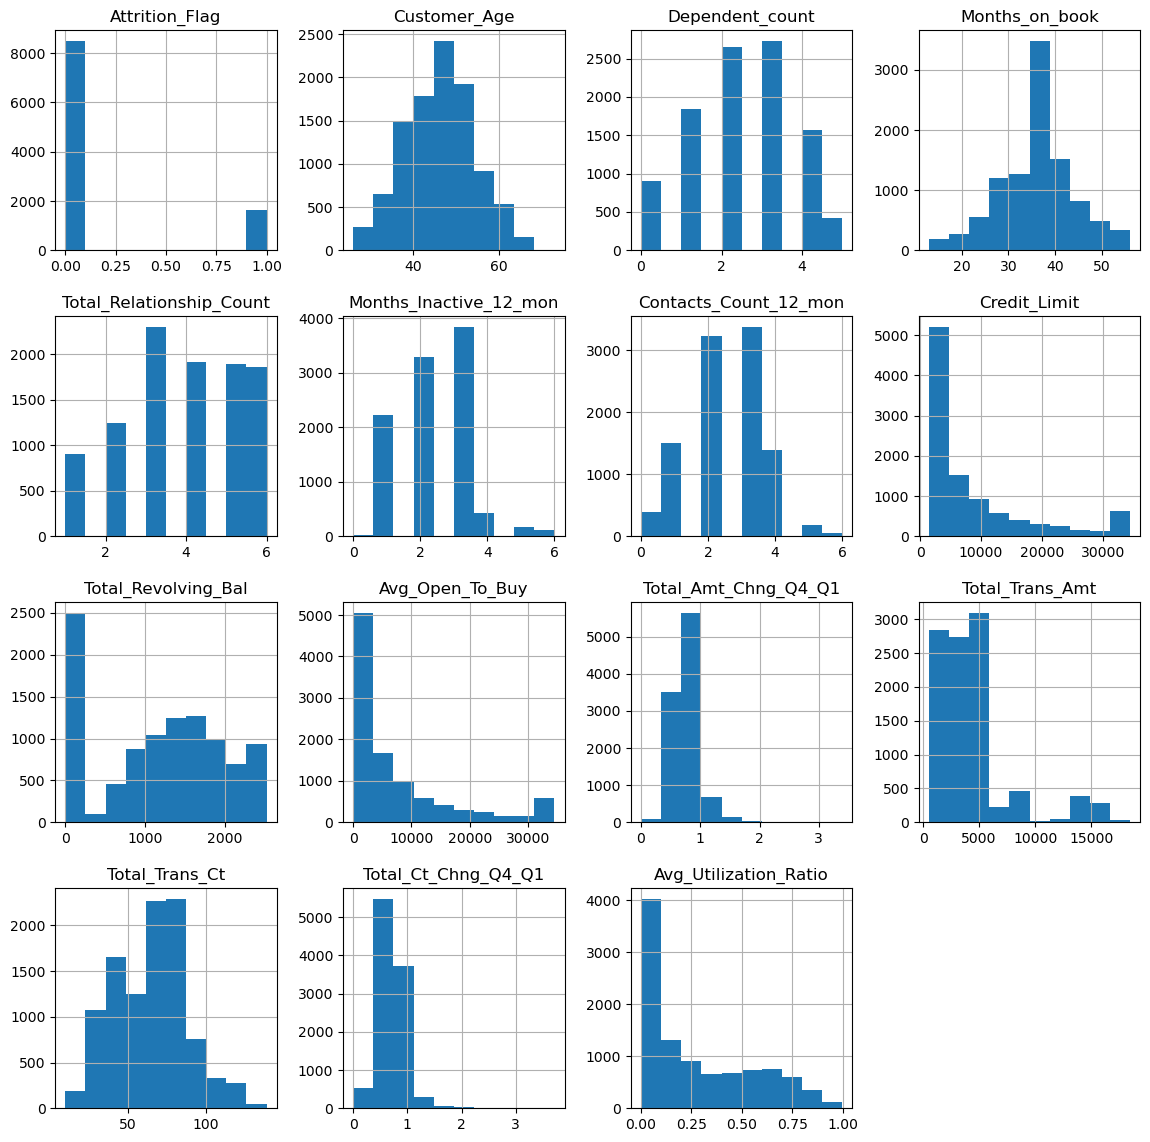

In [ ]:
# Overall Numerical data plots
df.hist(figsize=(14,14))
plt.show()

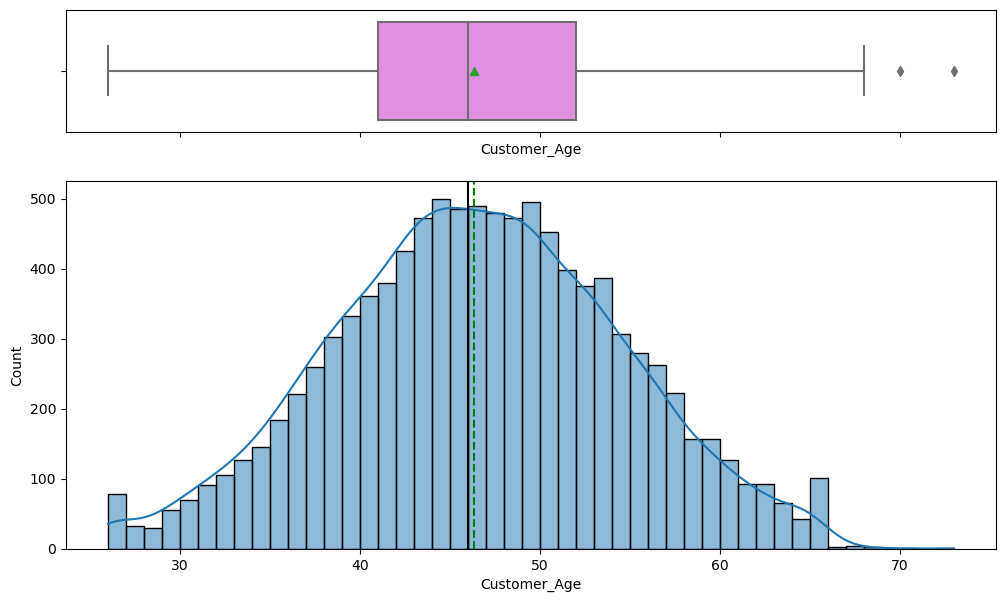

In [ ]:
# Continuous Data
histogram_boxplot(df, "Customer_Age", kde=True)

Very normalized distribution of customer age with the mean customer being ~45.

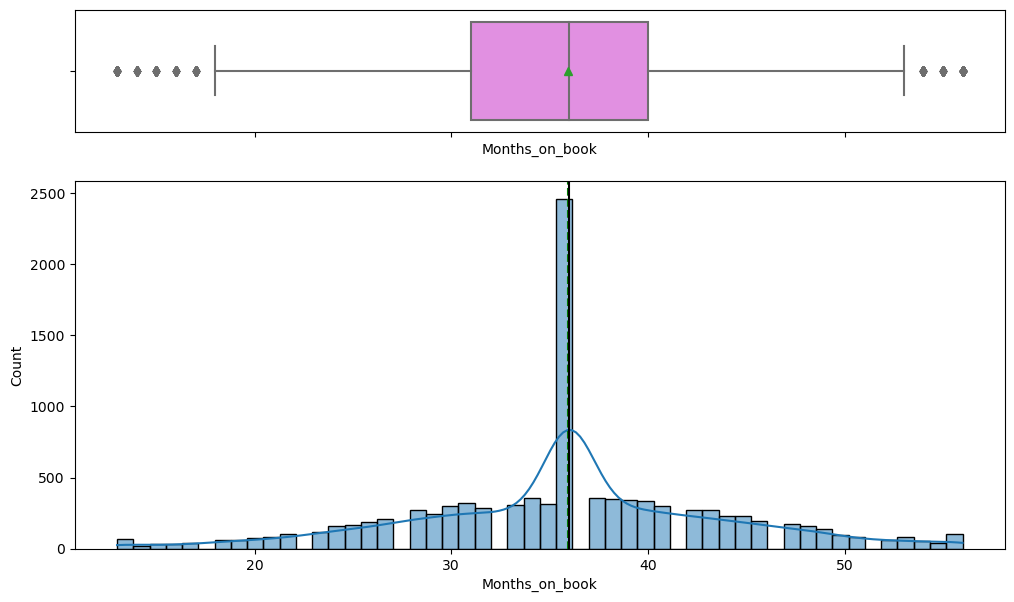

In [ ]:
histogram_boxplot(df, "Months_on_book", kde=True)

Highly concentrated distribution, with most clients having around ~35 months with the bank and trailing sharply off in both other directions.

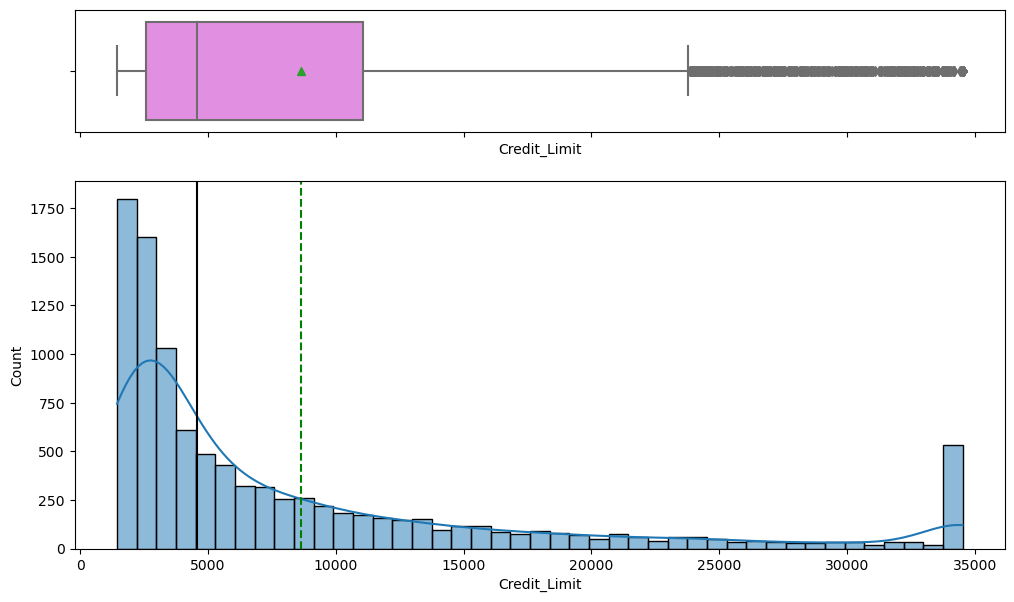

In [ ]:
histogram_boxplot(df, "Credit_Limit", kde=True)

Highly right skewed distribution of the credit limit with most customers having below 5000 of credit rating. There is an interesting uptick at the ~34,000 range with a significant amount of customers at that credit limit.

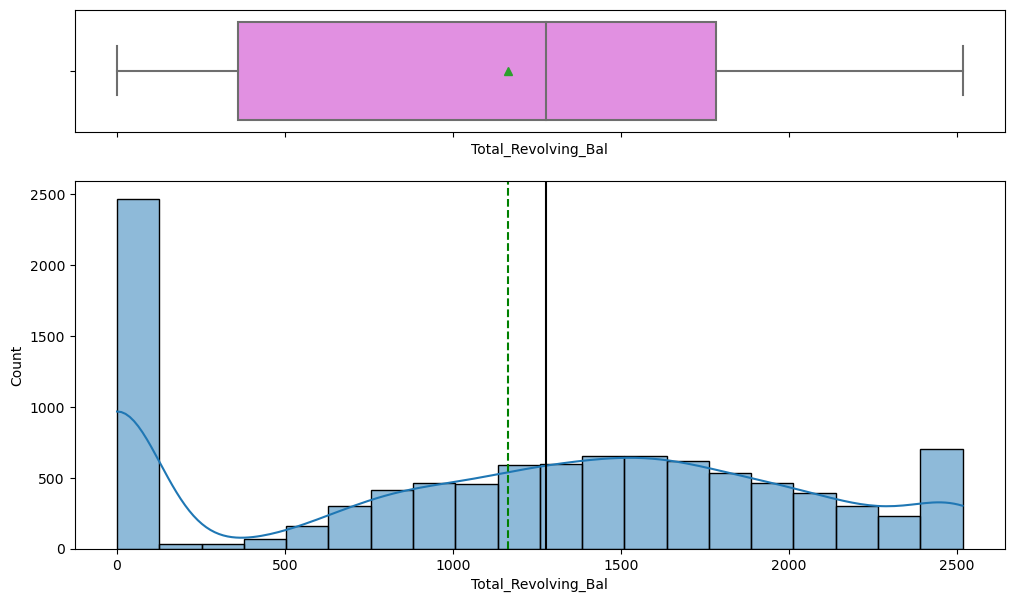

In [ ]:
histogram_boxplot(df, "Total_Revolving_Bal", kde=True)

There are two strage peaks at 0 and 2500, signifying most people either pay off all of their balance at the end of the month or leave it for the next month. The rest of the distribution has the form of a normal distribution.

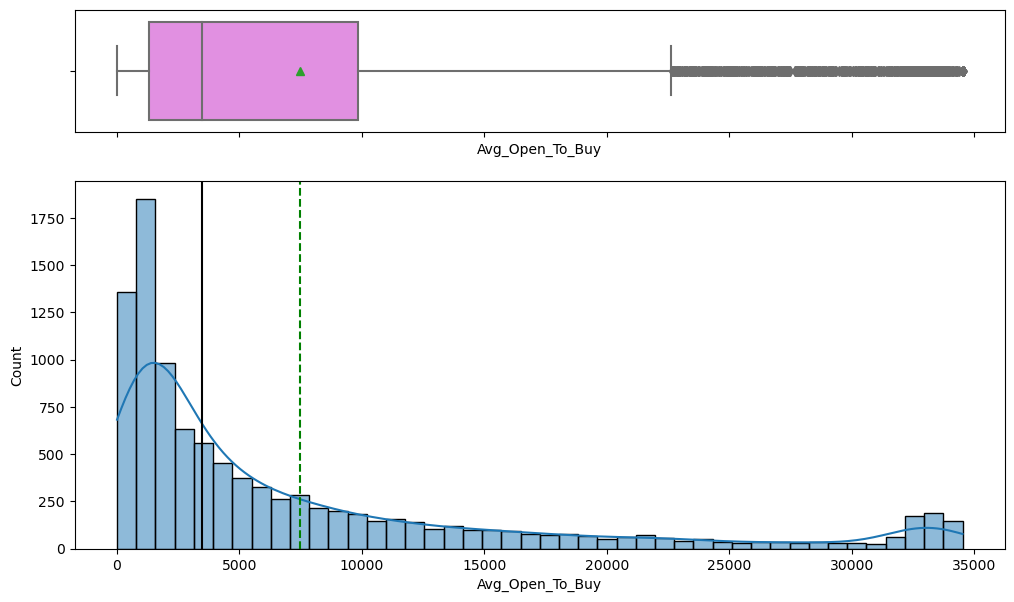

In [ ]:
histogram_boxplot(df, "Avg_Open_To_Buy", kde=True)

Highly right skewed distribution which means most people leave little available credit on their cards by the end fo the month.

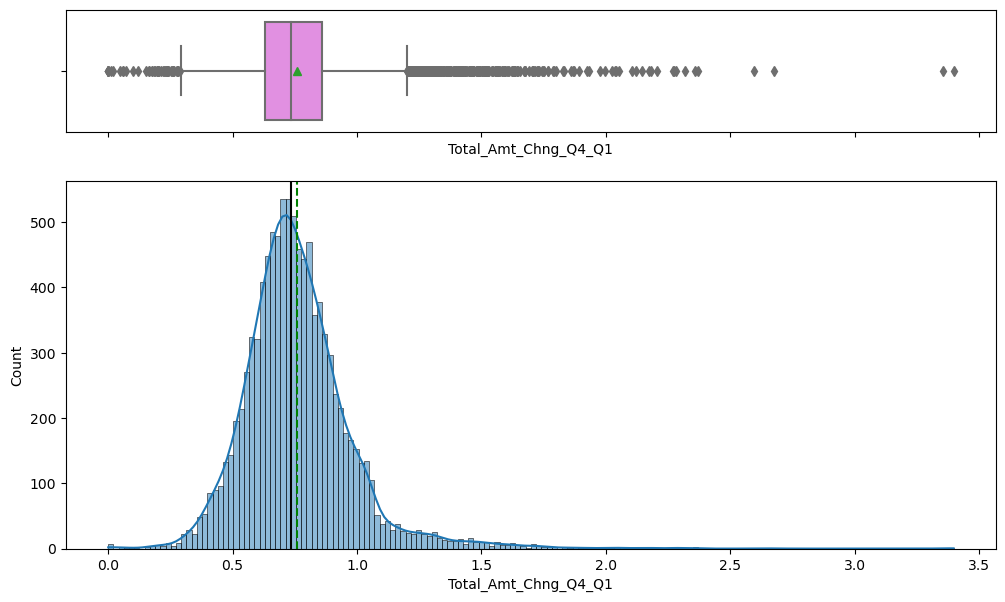

In [ ]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1", kde=True)

Normal distribution with a longer right tail vs. the left tail. The fact that the ratio sits bellow 1 means that there is an attrition of customer transaction amount from Q1 to Q4. There are around ~0.75 the amount of transactios in Q4 than what is seen in Q1, meaning customer activity could be depleated.

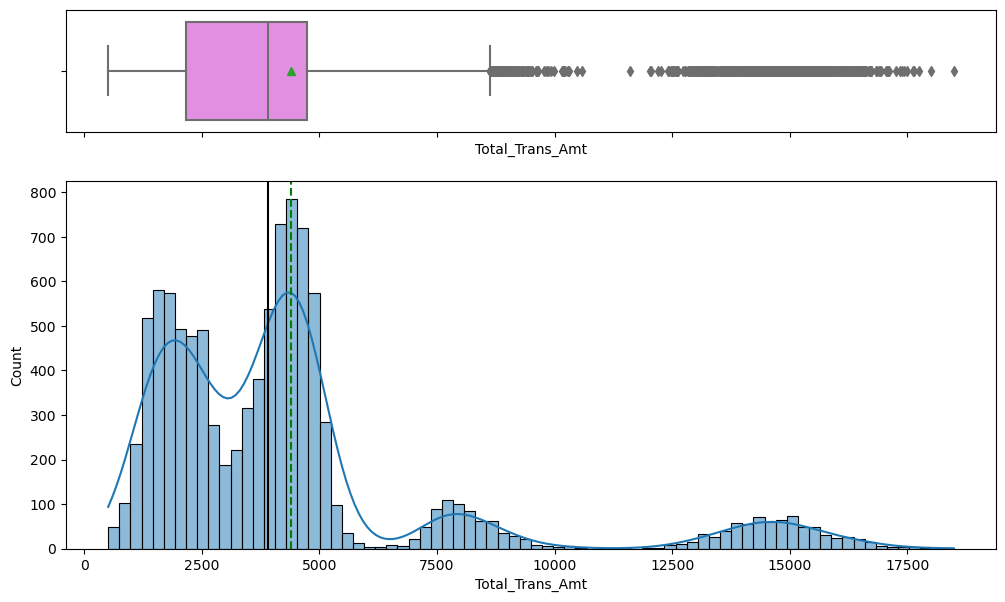

In [ ]:
histogram_boxplot(df, "Total_Trans_Amt", kde=True)

Multi-modal distribution wtih two large peaks and two smaller ones. It is interesting to see that the total transaction amount is not as normally distributed as one could expect.

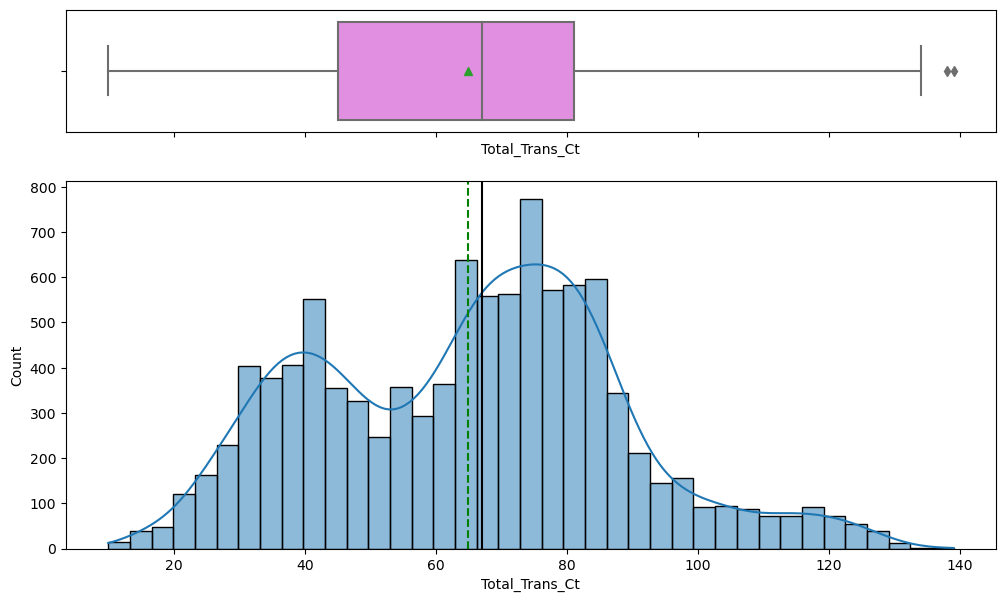

In [ ]:
histogram_boxplot(df, "Total_Trans_Ct", kde=True)

Bimodal distribution with peaks at around 78 and 40. This should have some similarities to the total_trans_amt since it is also a bimodal distribution, if we were to consider the mean transaction value.

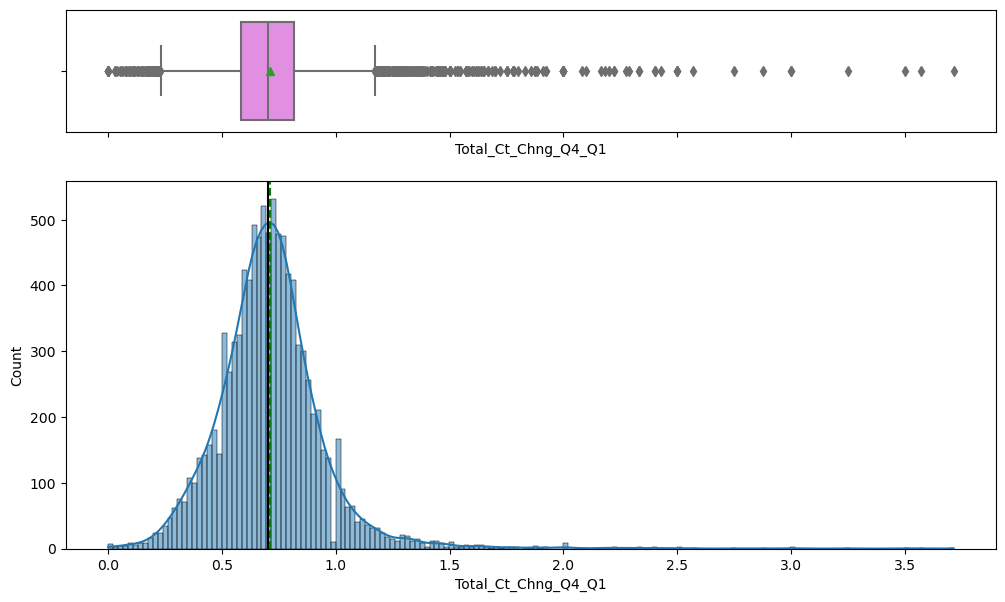

In [ ]:
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1", kde=True)

Binomial distribution with a much longer right tail, once again we can observet that the depletion of customer activity from Q4 to Q1 with Q4 only having ~0.7 the amount of transactions Q1 has.

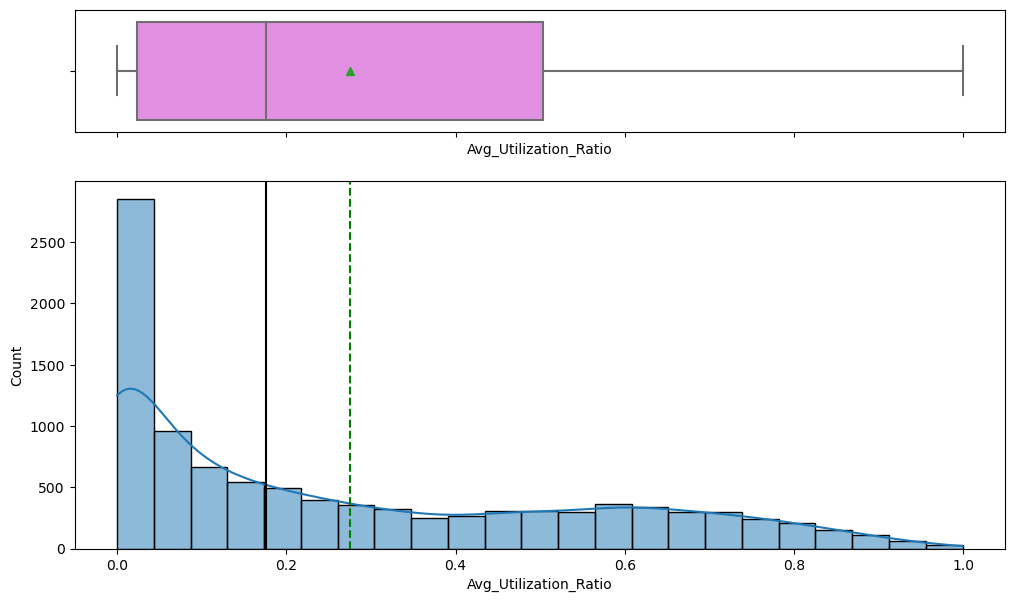

In [ ]:
histogram_boxplot(df, "Avg_Utilization_Ratio", kde=True)

Heavily right skewed distribution meaning that most customers spend most of their available credit per month.

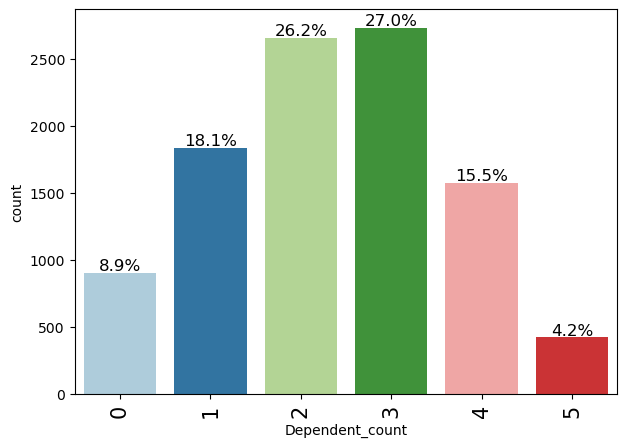

In [ ]:
# Discrete Data
labeled_barplot(df, "Dependent_count", perc=True)

Normally distributed with most people having 3 or 2 dependands with a 2% and a 26.2% respectively.

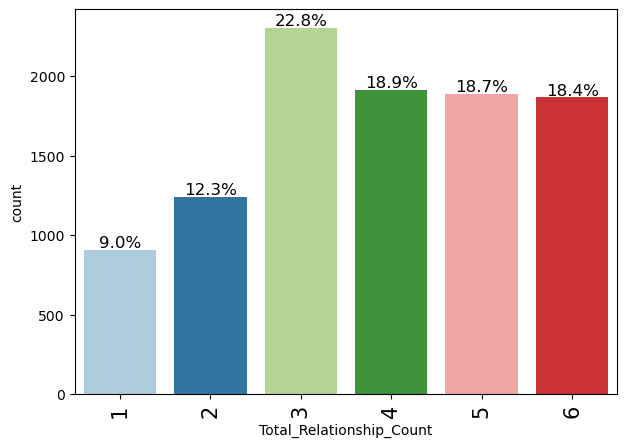

In [ ]:
labeled_barplot(df, "Total_Relationship_Count", perc=True)

Most customers hold more than 3 products with only 21.3% holding less than 3 products. Most have 3 products, 22.8% and there is an almost equal amout of people that have 5, 5, or 6 products.

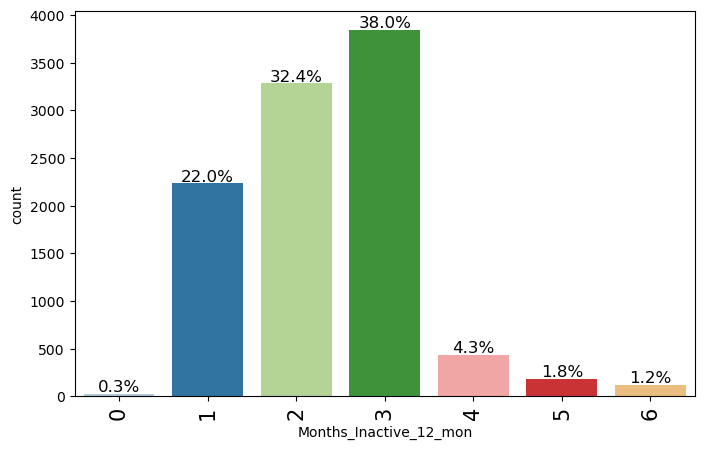

In [ ]:
labeled_barplot(df, "Months_Inactive_12_mon", perc=True)

Most customers are innactive for less than a quarter of the year, with 92.7% of customers innactive 0-3 months of the year. However, almost no customers are innactive for no months of the year with only 0.3% of customers filling this category.

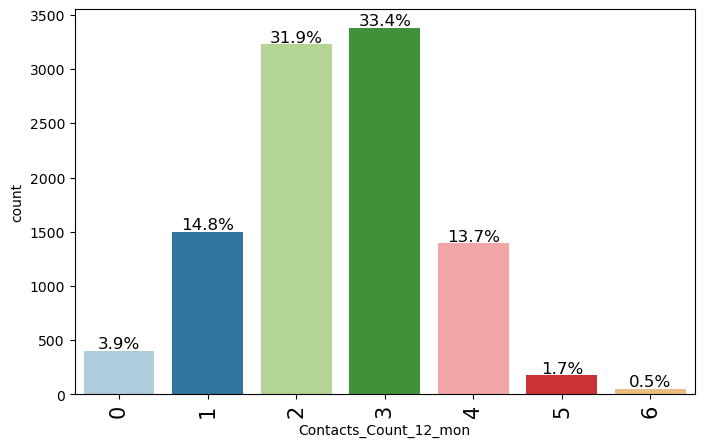

In [ ]:
labeled_barplot(df, "Contacts_Count_12_mon", perc=True)

Normally distributed with most customer having about 3, 2, or 4 interactions with the bank and almost none having 0, 5 or 6,

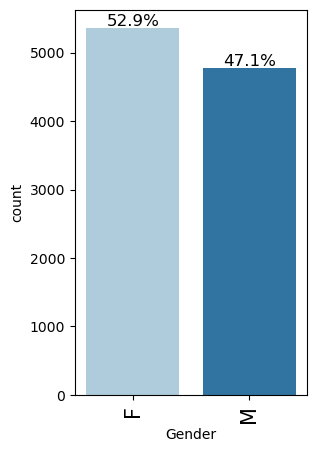

In [ ]:
labeled_barplot(df, "Gender", perc=True)

Almost even distribution of female and male customers.

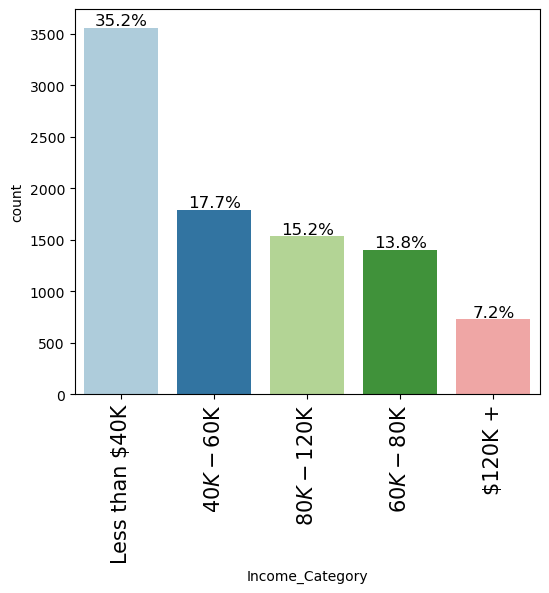

In [ ]:
labeled_barplot(df, "Income_Category", perc=True)

Right skewed distribution withmost clients earning less than $40k a month (35.2%).

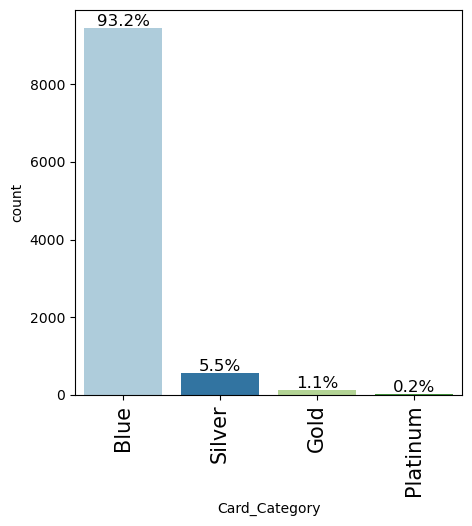

In [ ]:
labeled_barplot(df, "Card_Category", perc=True)

Most customers have the blue card, which guessing by the ordered nature of the cards the blue is the easiest to get and presents the least perks.

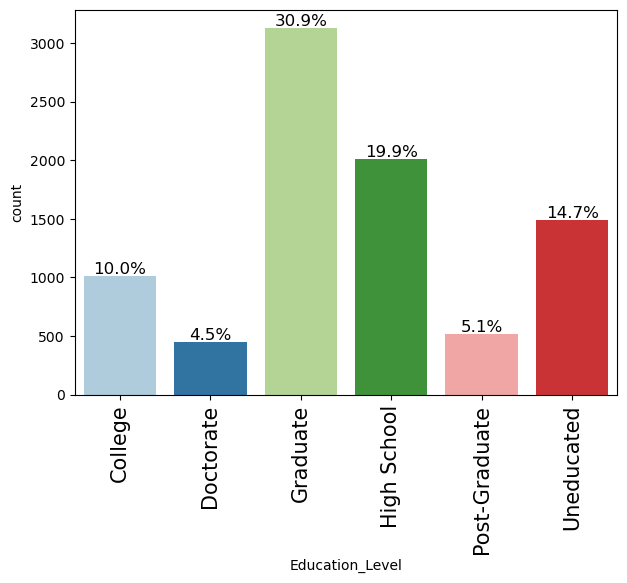

In [ ]:
labeled_barplot(df, "Education_Level", perc=True)

Most customers have a graduate degree (20.9%) but only 9.6% go further than this. 14.7% are uneducated, 19.9% went to high school and 10% went to college.

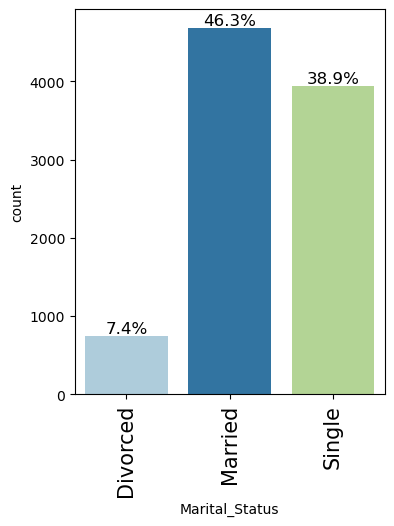

In [ ]:
labeled_barplot(df, "Marital_Status", perc=True)

Most clients are either married or single, with only 7.4% of clients being divorced.

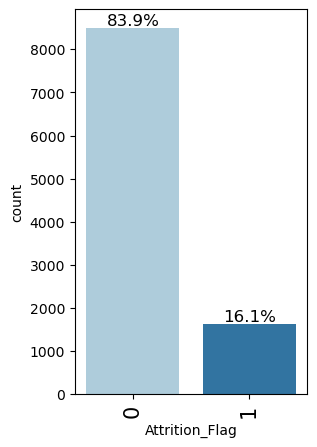

In [ ]:
# Target Variable
labeled_barplot(df, "Attrition_Flag", perc=True)

There is a significant skew in the distribution to customers that are still existing customers (0), while only 16.1% of customers are attrited customers. This will have to be taken into consideration while building our model and sampling.

### Bivariate Data Analysis

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

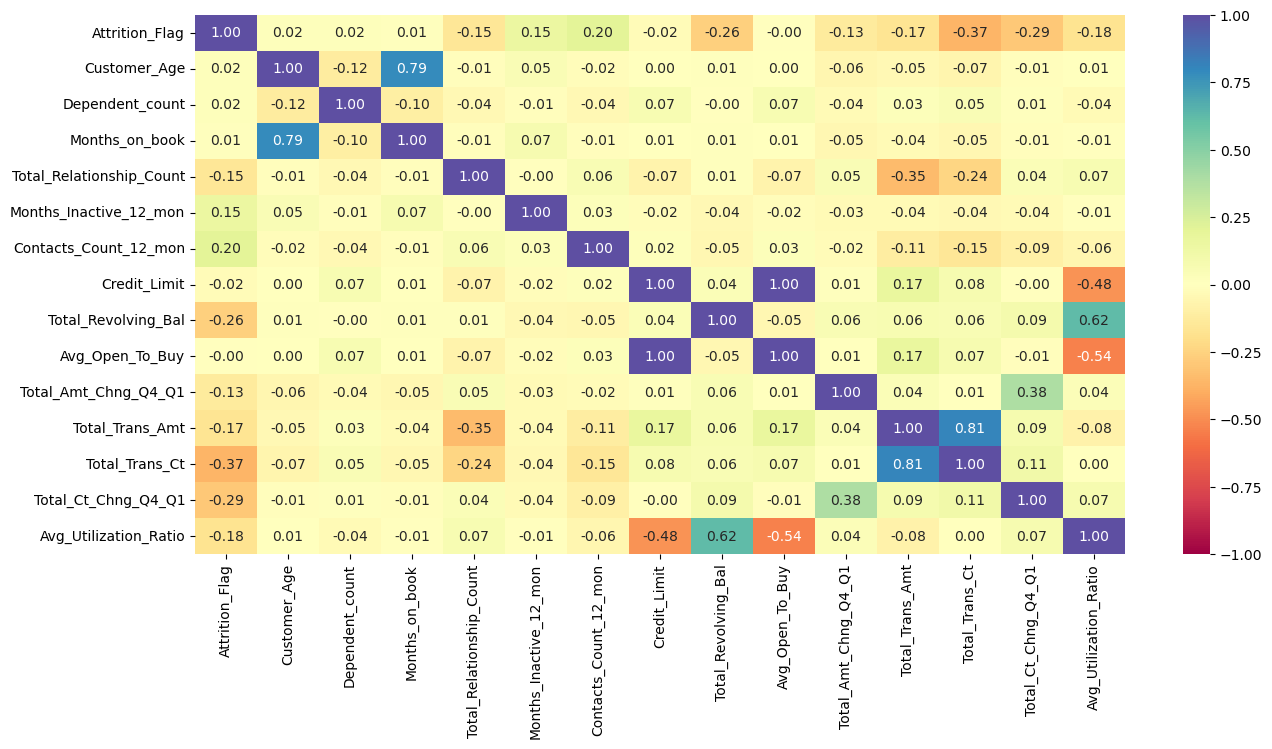

In [ ]:
# Correlation Check
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

There are no significant correlations to the target variable, and there are only 2 meaningfull correlation between the other variables. The first of the two correlated variables are Total_Trans_Ct and Total_Trans_Amt (correlation of 0.81), this makes sense ase a higher transaction count should lead to more transaction volume. The second is Customer_Age and Months_on_book (correlation of 0.79) this makes sense as higher age customers are expected to have longer relationships with the bank.

These correlated features could potentially create a lack of interaction between these variables and the model. However, due to the amount of features it should not have a large effect.

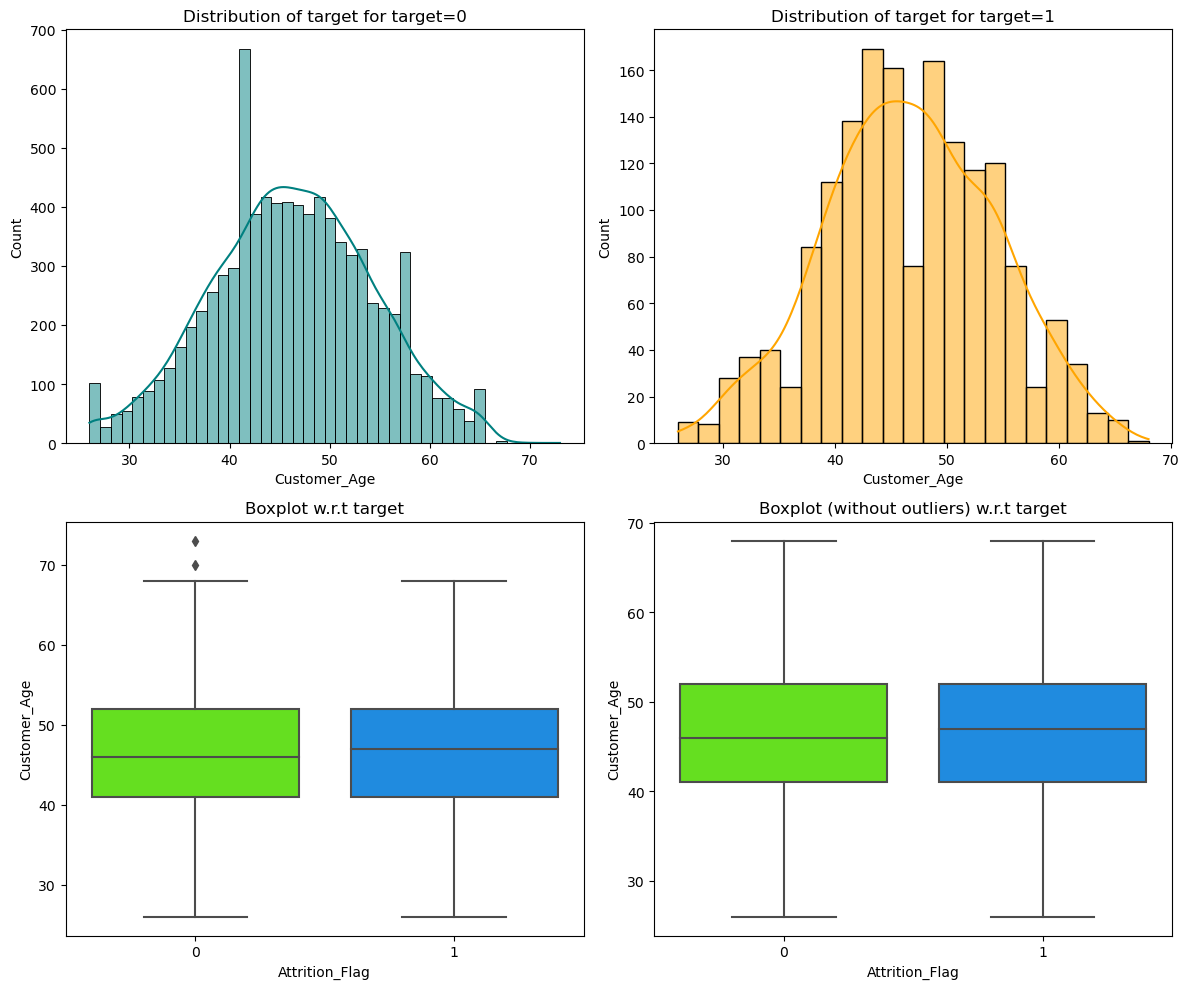

In [ ]:
# Continuous Variables
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag")


Very similar distributions between both attrition flag outcomes and customer age. There are difference but it is most likely due to the higher amount of existing customers vs. attrited customers.

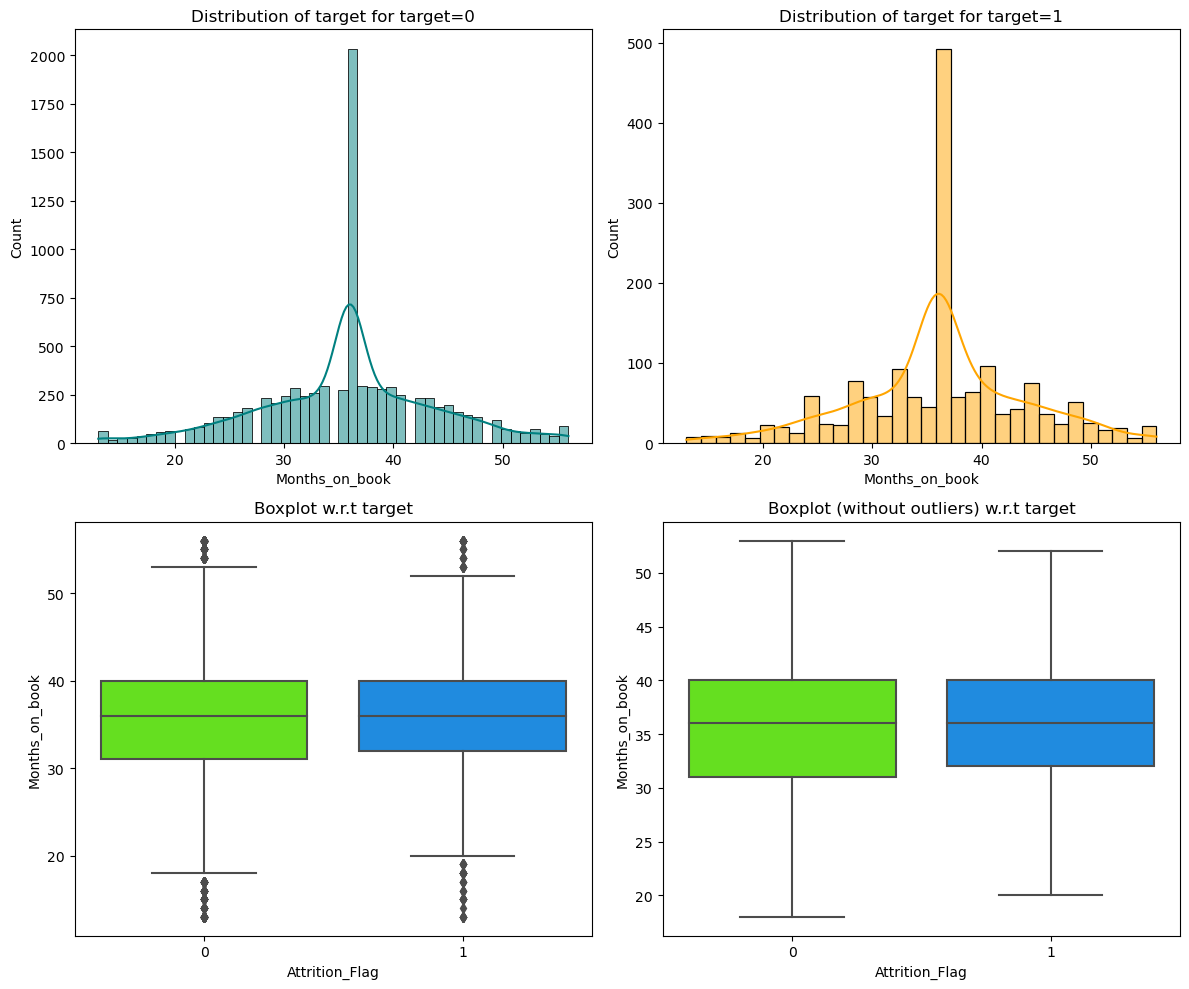

In [ ]:
distribution_plot_wrt_target(df, "Months_on_book", "Attrition_Flag")

Very similar distributions between both attrition flag outcomes and months_on_book. There are difference but it is most likely due to the higher amount of existing customers vs. attrited customers.

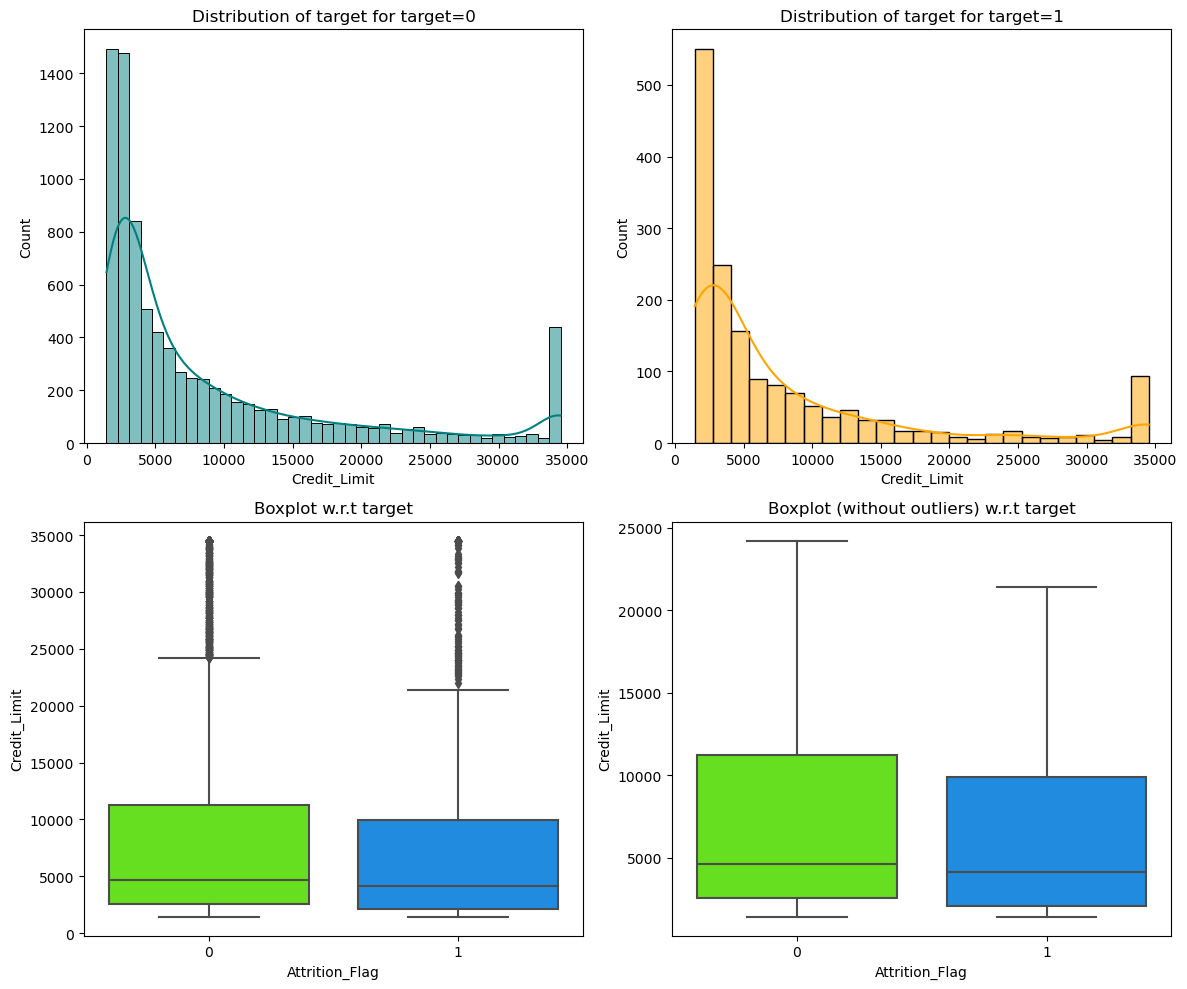

In [ ]:
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag")

Very similar distributions between both attrition flag outcomes and credit_limit. There are difference but it is most likely due to the higher amount of existing customers vs. attrited customers.

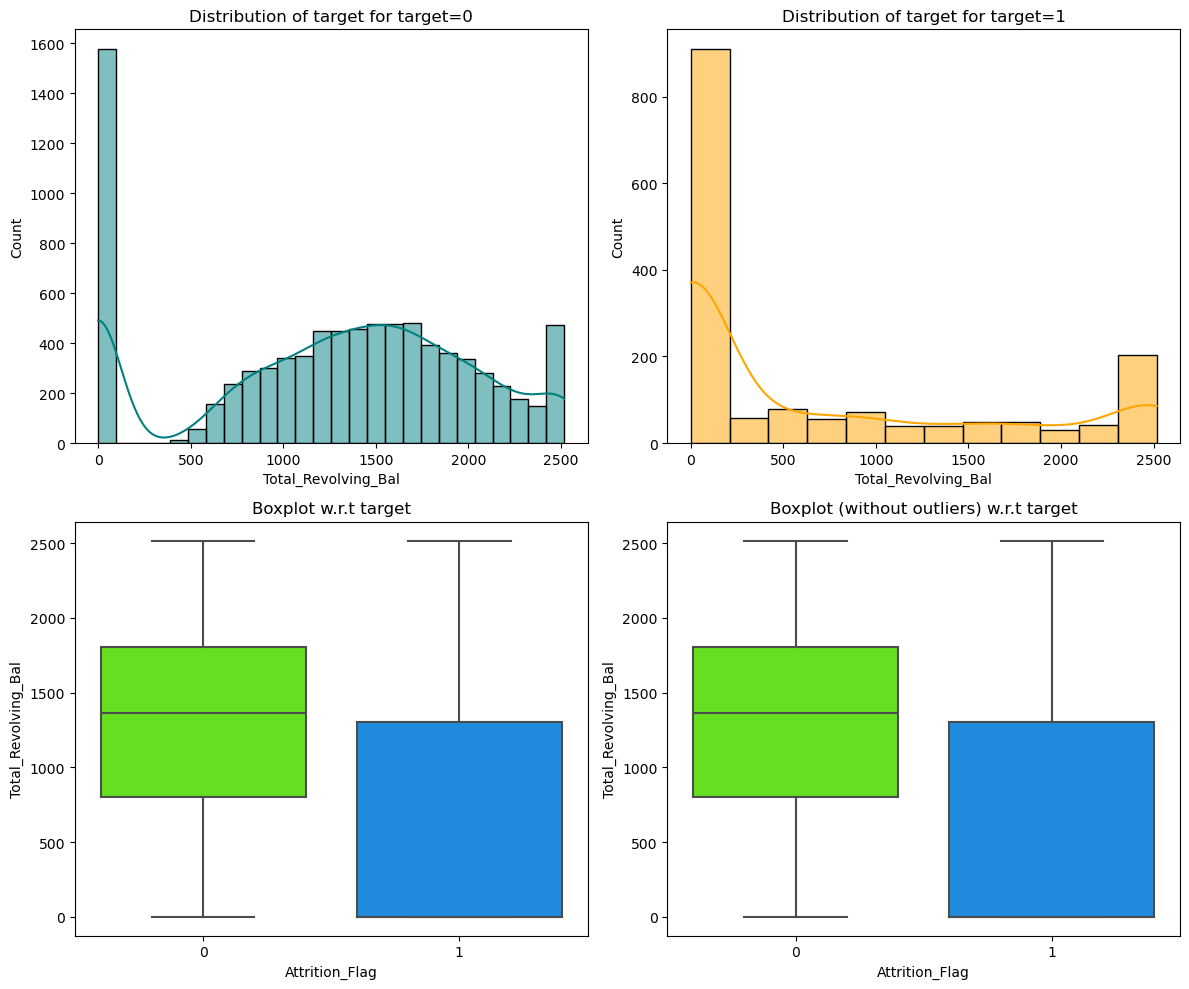

In [ ]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

This is the first studied variable that shows a discernable difference between customers that have been attrited and existing customers. The edge peaks remain the same, but we can see in the middle of the distribution that attried customers show less frequency changes vs. existing customers.

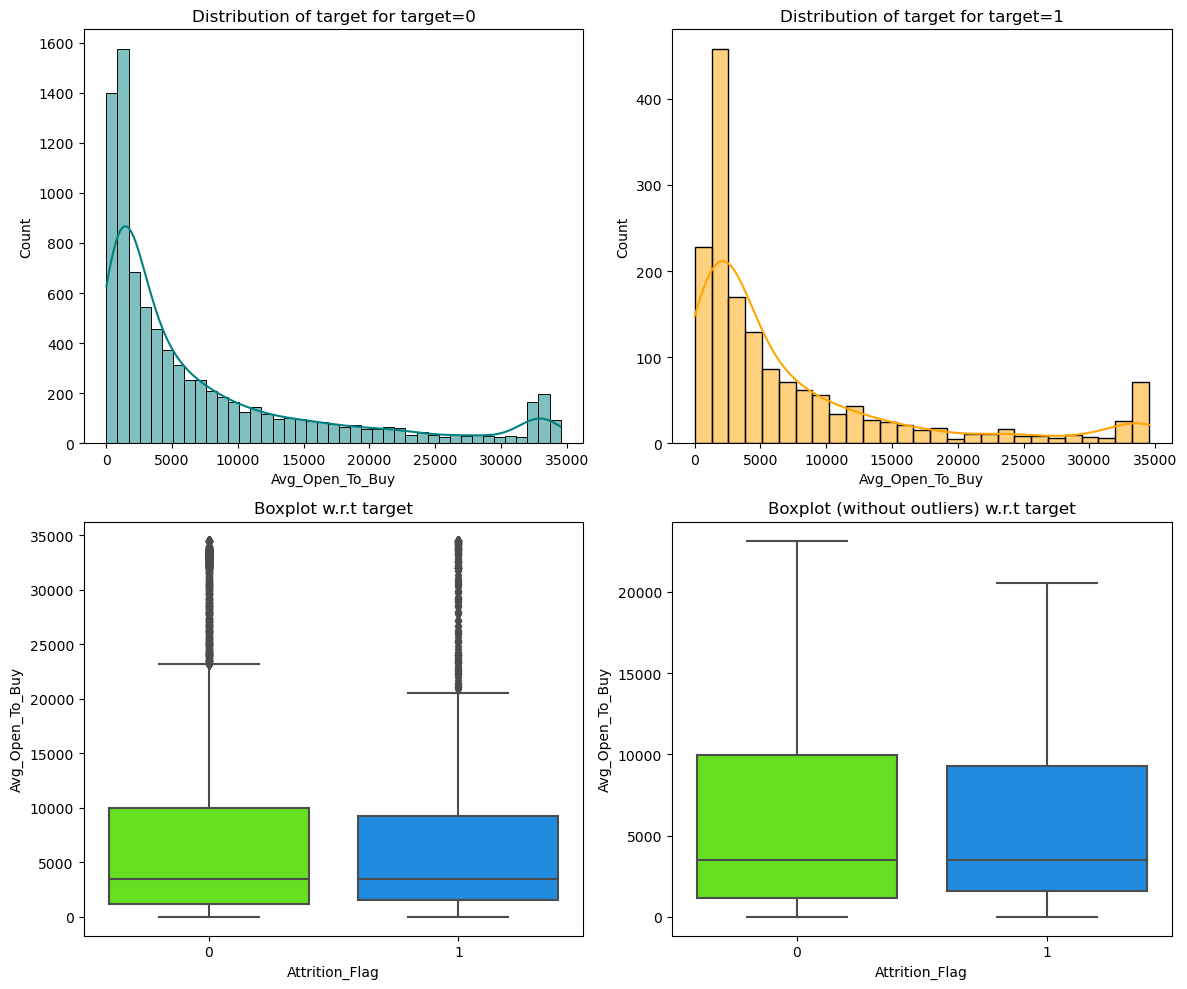

In [ ]:
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag")

Very similar distributions between both attrition flag outcomes and average open to buy. There are difference but it is most likely due to the higher amount of existing customers vs. attrited customers.

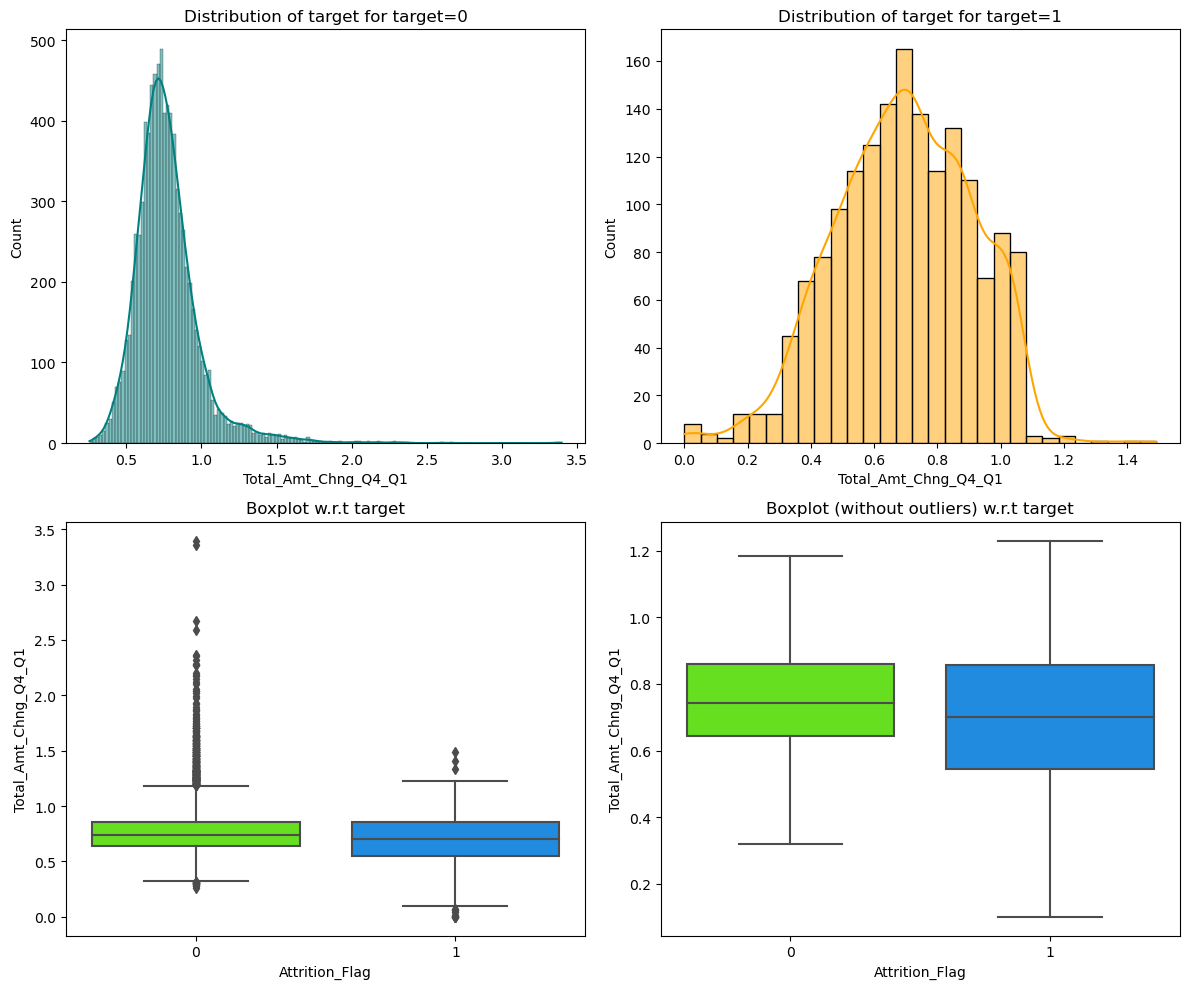

In [ ]:
distribution_plot_wrt_target(df, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

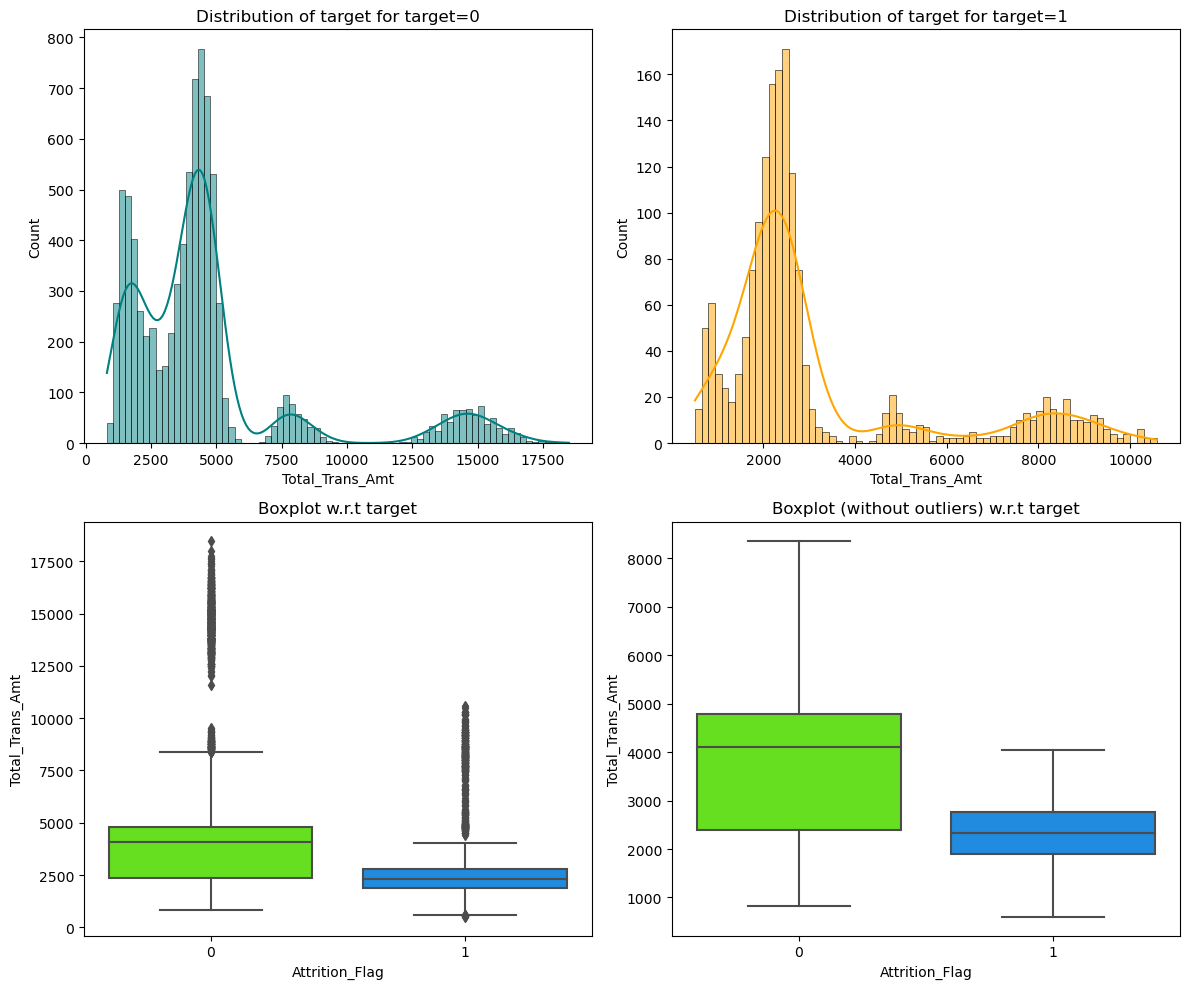

In [ ]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

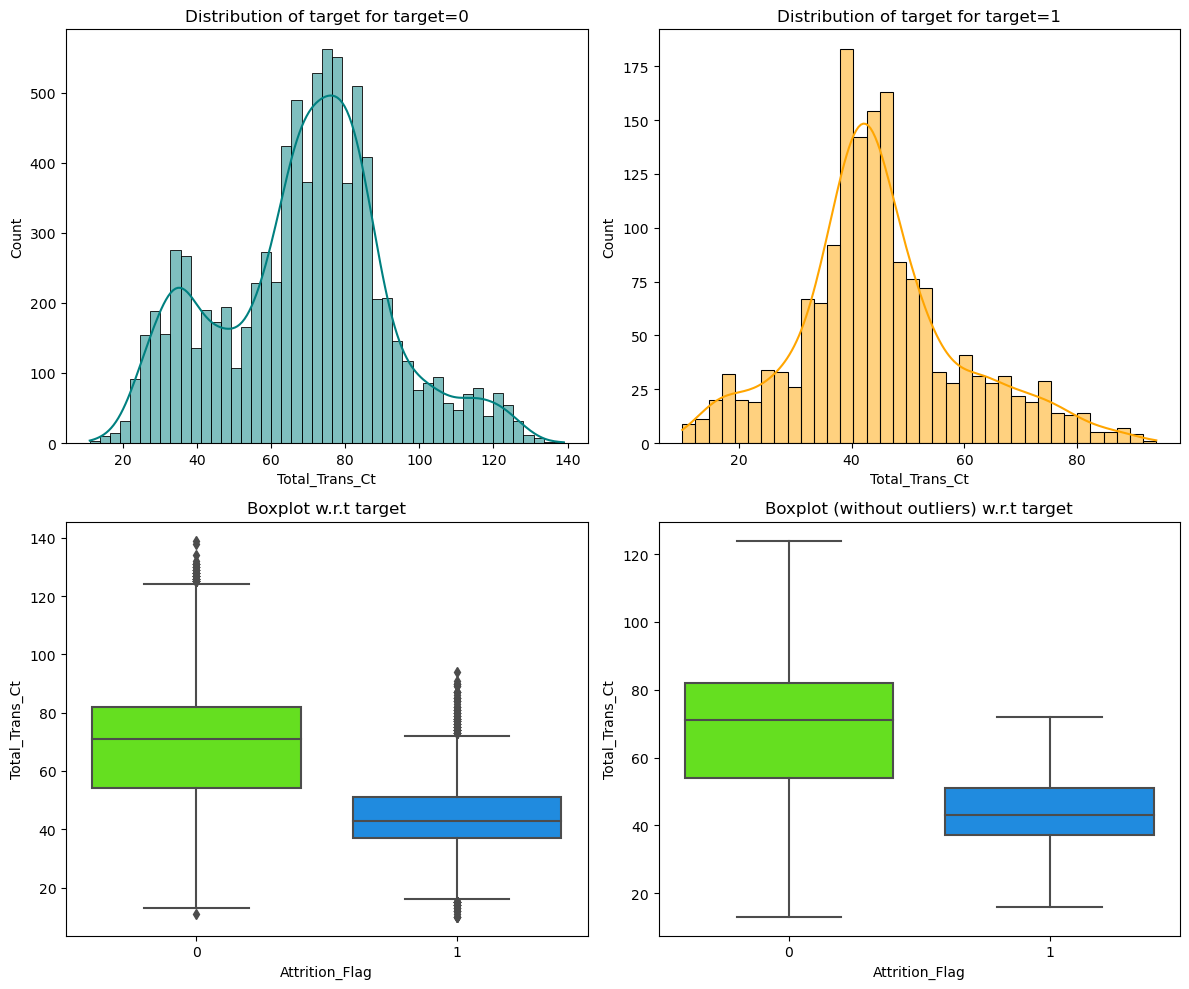

In [ ]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

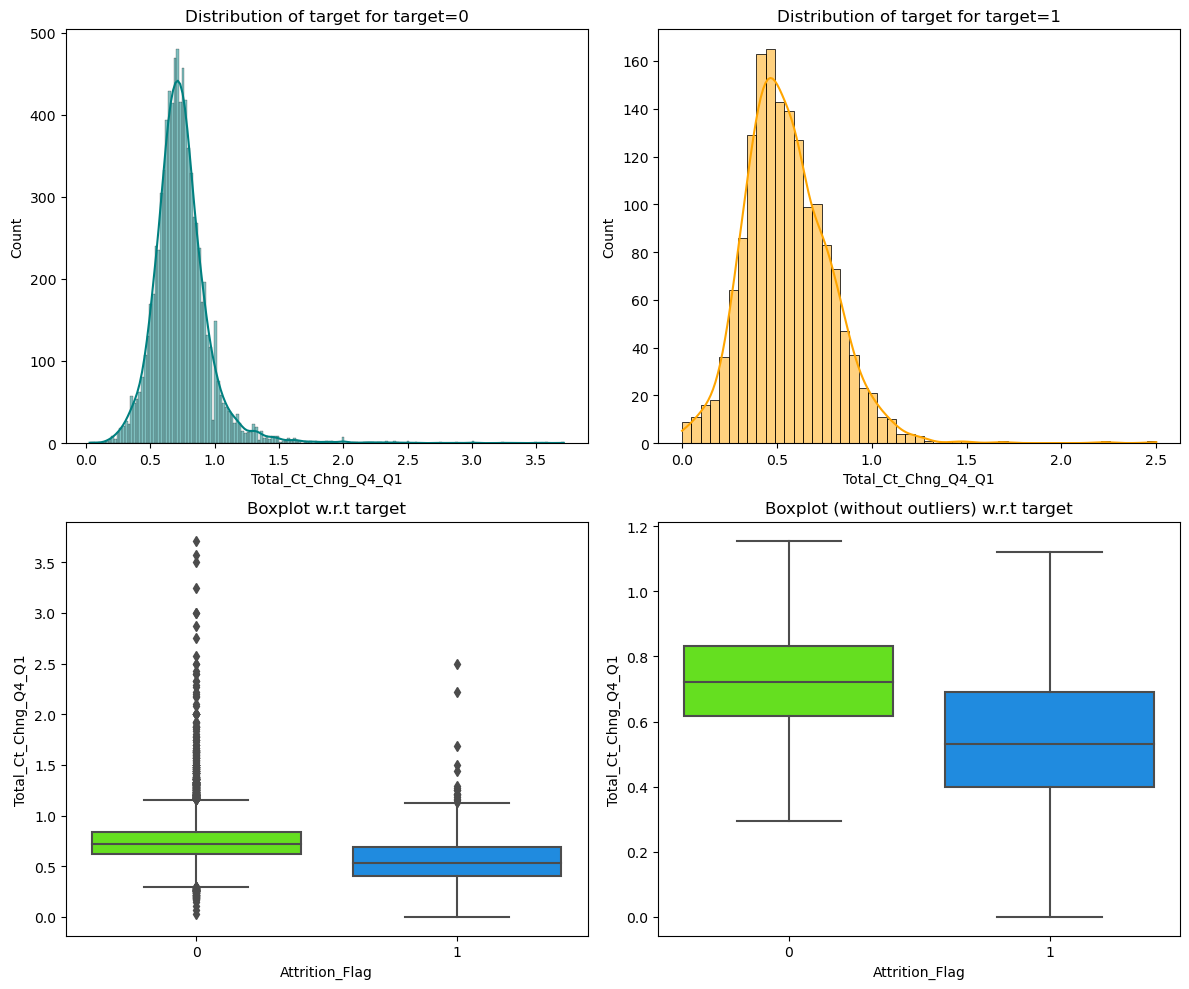

In [ ]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

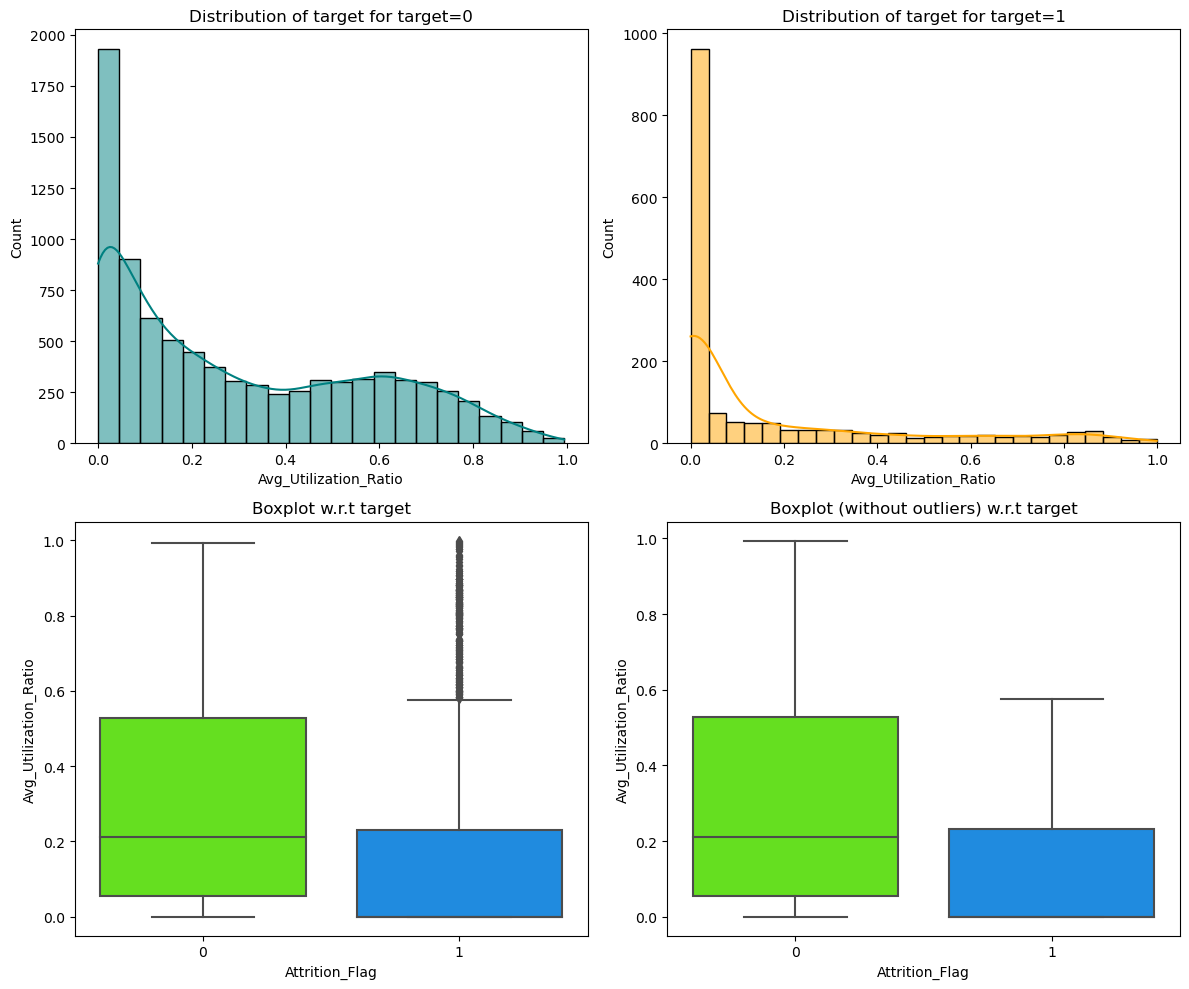

In [ ]:
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag")

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


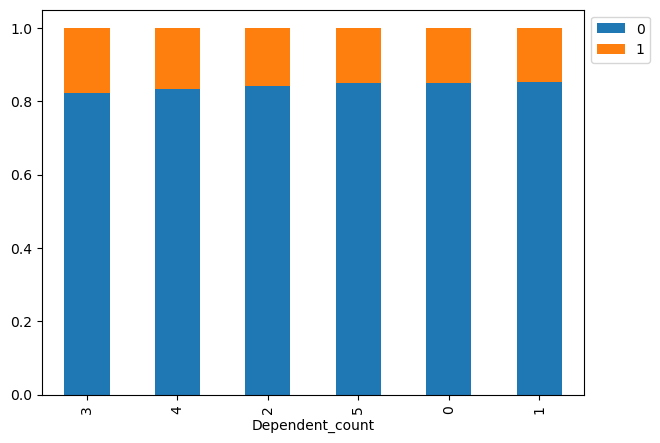

In [ ]:
# Discrete Variables
stacked_barplot(df, "Dependent_count", "Attrition_Flag")

The highest ratio of attrited customers had 3 and 4 dependants while the least was 0 and 1 dependants.

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


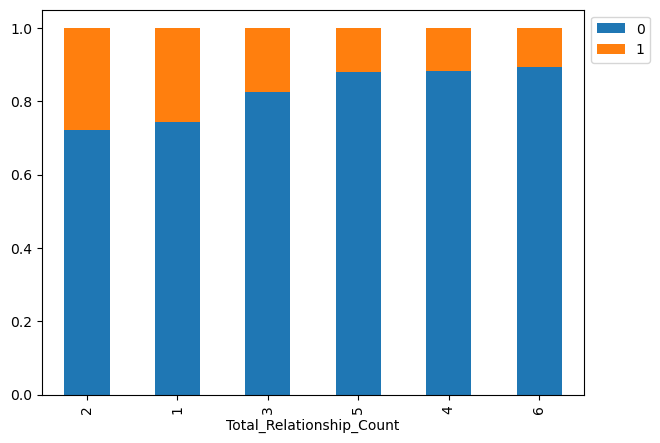

In [ ]:
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag")

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


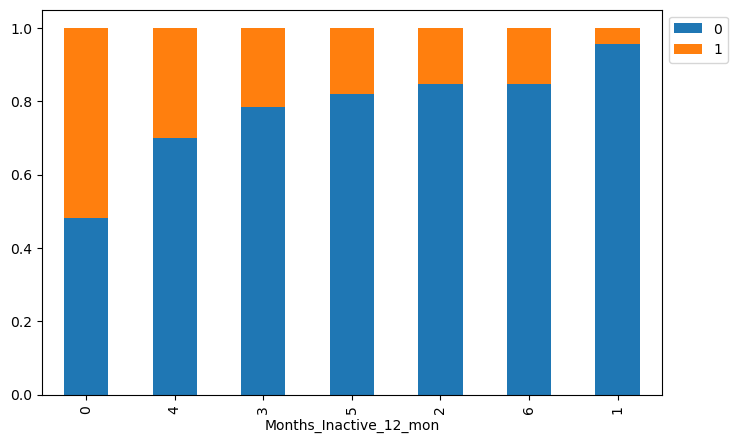

In [ ]:
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


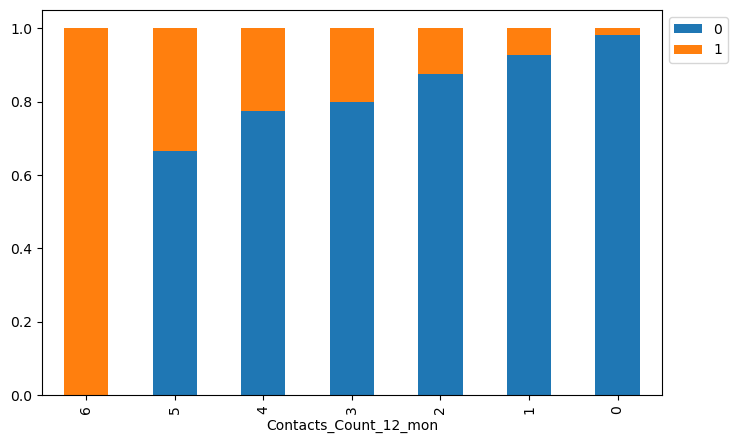

In [ ]:
stacked_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag")

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


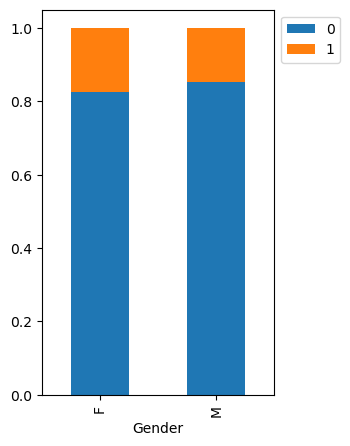

In [ ]:
stacked_barplot(df, "Gender", "Attrition_Flag")

Attrition_Flag      0     1   All
Income_Category                  
All              7575  1440  9015
Less than $40K   2949   612  3561
$40K - $60K      1519   271  1790
$80K - $120K     1293   242  1535
$60K - $80K      1213   189  1402
$120K +           601   126   727
------------------------------------------------------------------------------------------------------------------------


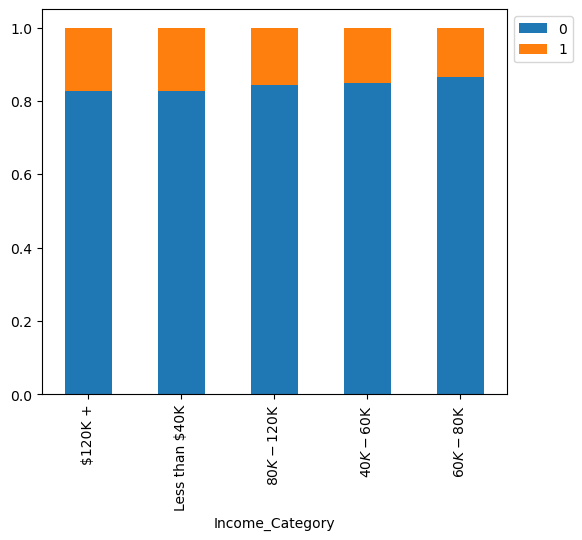

In [ ]:
stacked_barplot(df, "Income_Category", "Attrition_Flag")

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


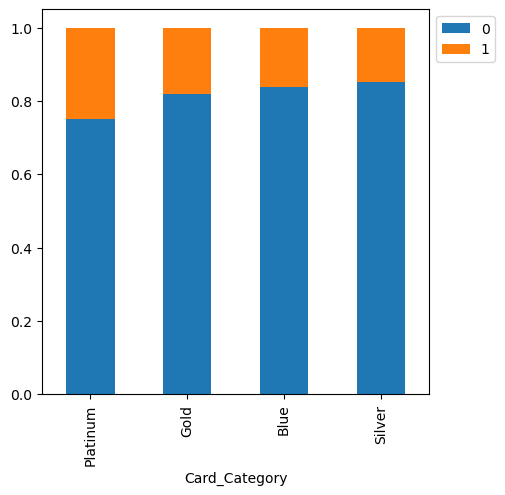

In [ ]:
stacked_barplot(df, "Card_Category", "Attrition_Flag")

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


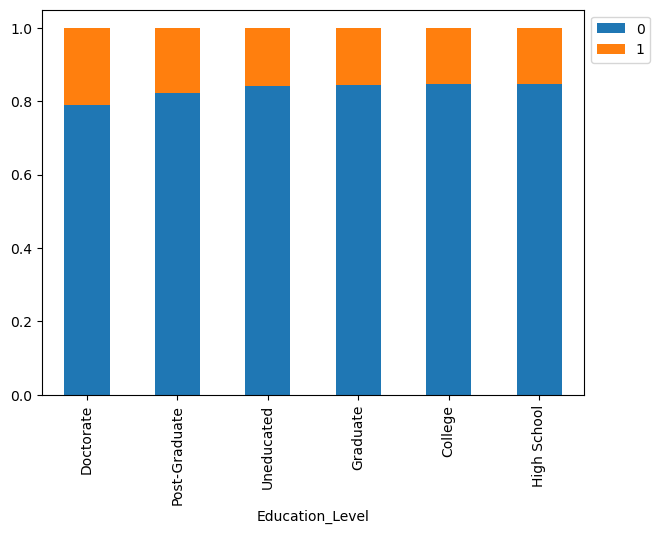

In [ ]:
stacked_barplot(df, "Education_Level", "Attrition_Flag")

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


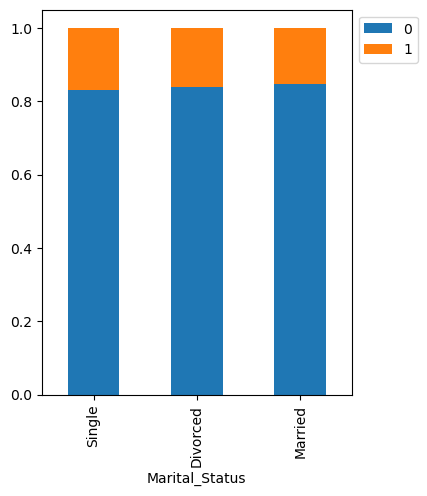

In [ ]:
stacked_barplot(df, "Marital_Status", "Attrition_Flag")

**Questions**:

1. How is the total transaction amount distributed?
  
  The distribution of the total transaction is a multi modal distribution concentrated mostly around 2 modes with an overall right skew. The two largest modes are around ~1,800 and ~4,800. There are two other peaks in the distribution but they are less pronounced.

2. What is the distribution of the level of education of customers?
  
  The education levels of customers has most customers with a Graduate degree (30.9%), followed by High School (19.9%), Uneducat4ed 14.7%, College (10%), Post-Graduate 5.1%, and lastly Doctorate (4.5%).

3. What is the distribution of the level of income of customers?
  
  The income category of customers is a right skewed distribution with most customers having an income of Less than $40K (35.2%). This is followed by the values of $40K - $60K (17.7%), $80K - $120K (15.2%), $60K - $80K (13.8%), $120K + (7.2%).

4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?

  The median transaction ammount is significantly higher for customers that still exist vs. attrited customers. The median total transaction amount for existing customers is around $4,000 while it is only around $2,500 for attrited customers. The distribution alsho shifts significantly as existing customers have a more bimodal distribution while attrited customers have a unimodal distribution. Also the right tail of existing customers is significantly larger, meaning that existing customers are more willing to transact more than attrited customers.

5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?

  Out of the 1627 samples of attrited customers, the number of months with the highest amount of attrited customers is 3 months with 826 (50.7%), followed closely by 2 months with 505 (31%), and 4 months with 130 (7.99%). The number of months innactive with the largest ratio of attrited customers vs. existing customers is 0, however, it has a very low sampling size of only 29 total samples so little conclusions can be drawn from it. However, 4 and 3 months (which have a much larger sample count) have ratios of 2.35 and 3.66 existing customers to attrited customers respectively.

6. What are the attributes that have a strong correlation with each other?
  
  The first of the two correlated variables are Total_Trans_Ct and Total_Trans_Amt (correlation of 0.81), this makes sense ase a higher transaction count should lead to more transaction volume. The second is Customer_Age and Months_on_book (correlation of 0.79) this makes sense as higher age customers are expected to have longer relationships with the bank.


## Data Pre-processing

In [ ]:
# Checking Outliers
Q1 = df.quantile(0.25)  # To find the 25th percentile
Q3 = df.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

((df.select_dtypes(include=["float64", "int64"]) < lower) | (df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(df) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

There is a low amount of outliers for every data set, and since they could provide some interesting information there is no need to further clean them.

## Train Test Split

In [ ]:
x = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)
print(x_train.shape, x_val.shape, x_test.shape)

(6075, 19) (2026, 19) (2026, 19)


## Missing value imputation




In [ ]:
imputer = SimpleImputer(strategy="most_frequent")

cols_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

# For Training Data
x_train[cols_for_impute] = imputer.fit_transform(x_train[cols_for_impute])

# For Validation Data
x_val[cols_for_impute] = imputer.fit_transform(x_val[cols_for_impute])

# For Test Data
x_test[cols_for_impute] = imputer.fit_transform(x_test[cols_for_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(x_train.isna().sum())
print("-" * 30)
print(x_val.isna().sum())
print("-" * 30)
print(x_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

No more NaN values.

However, we will revise what values were placed with a value_counts function.

In [ ]:
cols = x_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(x_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3276
Single      2369
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = x_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(x_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         917
High School      404
Uneducated       306
College          199
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     1100
Single       770
Divorced     156
Name: Marital_Status, dtype: int64
******************************
Less than $40K    957
$40K - $60K       361
$80K - $120K      293
$60K - $80K       279
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = x_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(x_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3276
Single      2369
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


In [ ]:
# Create dummies for category variables
x_train = pd.get_dummies(x_train, drop_first=True)
x_val = pd.get_dummies(x_val, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

print(x_train.shape, x_val.shape, x_test.shape)

(6075, 29) (2026, 29) (2026, 29)


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target, name=None):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    name = name if name is not None else type(model).__name__
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Model": name,
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="auc")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
# We could also use Gradient Boosting as another possible model.

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(x_train, y_train)
    scores = recall_score(y_train, model.predict(x_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(x_train, y_train)
    scores_val = recall_score(y_val, model.predict(x_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9877049180327869


Random forest: 1.0
Adaboost: 0.826844262295082
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.8128834355828221
Random forest: 0.8067484662576687
Adaboost: 0.852760736196319
Xgboost: 0.8834355828220859
dtree: 0.8190184049079755


* XGboost has the best validation performance at 0.8834, followed by Adaboost at 0.8528.

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(x_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



In [ ]:
# Models wiht oversampling:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_over.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="auc")))
models_over.append(("dtree", DecisionTreeClassifier(random_state=1)))
# We could also use Gradient Boosting as another possible model.

print("\n" "Training Performance:" "\n")
for name, model in models_over:
    model.fit(x_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(x_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models_over:
    model.fit(x_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(x_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9976465973720338
Random forest: 1.0
Adaboost: 0.9690135320651108
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.8619631901840491
Random forest: 0.8588957055214724
Adaboost: 0.901840490797546
Xgboost: 0.8987730061349694
dtree: 0.8374233128834356


* Best oversampled model is Adaboost with 0.901 validation performance, followed closely by Xgboost at 0.899

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
x_train_un, y_train_un = rus.fit_resample(x_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))


print("After Oversampling, the shape of train_X: {}".format(x_train_un.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 976
After Oversampling, counts of label 'No': 976 

After Oversampling, the shape of train_X: (1952, 29)
After Oversampling, the shape of train_y: (1952,) 



In [ ]:
# Models wiht oversampling:
models_un = []  # Empty list to store all the models

# Appending models into the list
models_un.append(("Bagging", BaggingClassifier(random_state=1)))
models_un.append(("Random forest", RandomForestClassifier(random_state=1)))
models_un.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_un.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="auc")))
models_un.append(("dtree", DecisionTreeClassifier(random_state=1)))
# We could also use Gradient Boosting as another possible model.

print("\n" "Training Performance:" "\n")
for name, model in models_un:
    model.fit(x_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(x_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models_over:
    model.fit(x_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(x_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9907786885245902


Random forest: 1.0
Adaboost: 0.9528688524590164
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.9263803680981595
Random forest: 0.9294478527607362
Adaboost: 0.9601226993865031
Xgboost: 0.9570552147239264
dtree: 0.9141104294478528


* Best undersampled model is Adaboost with 0.960 validation performance, followed closely by Xgboost at 0.957.
* Undesampled models appear to be performing better than normally sampled and oversampled models.

### HyperparameterTuning

#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

#### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.751941391941392:


In [ ]:
# Tuned DecisionTreeClasifier with original data
tuned_dtree = DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf=7,
    min_impurity_decrease=0.0001,
    max_leaf_nodes=15,
    max_depth=5
)

tuned_dtree.fit(x_train, y_train)

tuned_dtree_grid = model_performance_classification_sklearn(tuned_dtree, x_val, y_val, name="Decision Tree Original")
print("Validation Performance:")
tuned_dtree_grid

Validation Performance:


,Model,Accuracy,Recall,Precision,F1
0,Decision Tree Original,0.930,0.782,0.785,0.783


#### Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.9111622313302161:


In [ ]:
# Tuned DecisionTreeClasifier with oversampled data
tuned_dtree_over = DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf=7,
    min_impurity_decrease=0.001,
    max_leaf_nodes=15,
    max_depth=4
)

tuned_dtree_over.fit(x_train_over, y_train_over)

tuned_dtree_over_grid = model_performance_classification_sklearn(tuned_dtree_over, x_val, y_val, name="Decision Tree Oversampled")
print("Training Performance:")
tuned_dtree_over_grid

Training Performance:


,Model,Accuracy,Recall,Precision,F1
0,Decision Tree Oversampled,0.914,0.862,0.685,0.764


#### Sample tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 14} with CV score=0.9539141810570383:


In [ ]:
# Tuned DecisionTreeClasifier with undersampled data
tuned_dtree_un = DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf=7,
    min_impurity_decrease=0.001,
    max_leaf_nodes=5,
    max_depth=14
)

tuned_dtree_un.fit(x_train_un, y_train_un)

tuned_dtree_un_grid = model_performance_classification_sklearn(tuned_dtree_un, x_val, y_val, name="Decision Tree Undersampled")
print("Validation Performance:")
tuned_dtree_un_grid

Validation Performance:


,Model,Accuracy,Recall,Precision,F1
0,Decision Tree Undersampled,0.735,0.966,0.375,0.540


#### Decision Tree Model Aggregation

In [ ]:
# Decision Tree Model Aggregation

tuned_dtree_model_grid = pd.concat(
    [
        tuned_dtree_grid.T,
        tuned_dtree_over_grid.T,
        tuned_dtree_un_grid.T,
    ],
    axis=1,
)
tuned_dtree_model_grid.columns= tuned_dtree_model_grid.iloc[0]
tuned_dtree_model_grid = tuned_dtree_model_grid[1:]
tuned_dtree_model_grid

Model,Decision Tree Original,Decision Tree Oversampled,Decision Tree Undersampled
Accuracy,0.930,0.914,0.735
Recall,0.782,0.862,0.966
Precision,0.785,0.685,0.375
F1,0.783,0.764,0.540


#### Tuning method for Adaboosting tree with original data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8647409733124019:


In [ ]:
tuned_adaboost = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1)
)

tuned_adaboost.fit(x_train, y_train)

tuned_adaboost_grid = model_performance_classification_sklearn(tuned_adaboost, x_val, y_val, name="AdaBoost Original")
print("Validation Performance:")
tuned_adaboost_grid

Validation Performance:


,Model,Accuracy,Recall,Precision,F1
0,AdaBoost Original,0.967,0.871,0.922,0.896


#### Tuning method for Adaboosting tree with oversampled data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9437243356616445:


In [ ]:
tuned_adaboost_over = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1)
)

tuned_adaboost_over.fit(x_train_over, y_train_over)

tuned_adaboost_over_grid = model_performance_classification_sklearn(tuned_adaboost_over, x_val, y_val, name="AdaBoost Oversampled")
print("Validation Performance:")
tuned_adaboost_over_grid

Validation Performance:


,Model,Accuracy,Recall,Precision,F1
0,AdaBoost Oversampled,0.967,0.911,0.889,0.900


#### Tuning method for Adaboosting tree with undersampled data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9436630036630037:


In [ ]:
tuned_adaboost_un = AdaBoostClassifier(
    random_state=1,
    n_estimators=70,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1)
)

tuned_adaboost_un.fit(x_train_un, y_train_un)

tuned_adaboost_un_grid = model_performance_classification_sklearn(tuned_adaboost_un, x_val, y_val, name="AdaBoost Undersampled")
print("Validation Performance:")
tuned_adaboost_un_grid

Validation Performance:


,Model,Accuracy,Recall,Precision,F1
0,AdaBoost Undersampled,0.930,0.972,0.704,0.817


#### Adaboost Model Aggregation

In [ ]:
#Model Aggregation for Adaboosting
tuned_adaboost_model_grid = pd.concat(
    [
        tuned_adaboost_grid.T,
        tuned_adaboost_over_grid.T,
        tuned_adaboost_un_grid.T,
    ],
    axis=1,
)

tuned_adaboost_model_grid.columns= tuned_adaboost_model_grid.iloc[0]
tuned_adaboost_model_grid = tuned_adaboost_model_grid[1:]
tuned_adaboost_model_grid

Model,AdaBoost Original,AdaBoost Oversampled,AdaBoost Undersampled
Accuracy,0.967,0.967,0.930
Recall,0.871,0.911,0.972
Precision,0.922,0.889,0.704
F1,0.896,0.900,0.817


#### Tuning method for XGBoosting tree with original data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="auc")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'n_estimators':np.arange(50,150,50),
    'scale_pos_weight':[2,5,10],
    'learning_rate':[0.01,0.1,0.2,0.05],
    'gamma':[0,1,3,5],
    'subsample':[0.8,0.9,1],
    'max_depth':np.arange(1,5,1),
    'reg_lambda':[5,10]
}
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9631030873888017:


In [ ]:
tuned_xgboost = XGBClassifier(
    random_state=1,
    eval_metric="auc",
    subsample=1,
    scale_pos_weight=10,
    reg_lambda=10,
    n_estimators=50,
    max_depth=2,
    learning_rate=0.05,
    gamma=1,
)

tuned_xgboost.fit(x_train, y_train)

tuned_xgboost_grid = model_performance_classification_sklearn(tuned_xgboost, x_val, y_val, name="XGBoost Original")
print("Validation Performance:")
tuned_xgboost_grid

Validation Performance:


,Model,Accuracy,Recall,Precision,F1
0,XGBoost Original,0.770,0.963,0.409,0.574


#### Tuning method for XGBoosting tree with oversampled data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="auc")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'n_estimators':np.arange(50,150,50),
    'scale_pos_weight':[2,5,10],
    'learning_rate':[0.01,0.1,0.2,0.05],
    'gamma':[0,1,3,5],
    'subsample':[0.8,0.9,1],
    'max_depth':np.arange(1,5,1),
    'reg_lambda':[5,10]
}
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9984313725490196:


In [ ]:
tuned_xgboost_over = XGBClassifier(
    random_state=1,
    eval_metric="auc",
    subsample=1,
    scale_pos_weight=10,
    reg_lambda=10,
    n_estimators=50,
    max_depth=2,
    learning_rate=0.05,
    gamma=1,
)

tuned_xgboost_over.fit(x_train_over, y_train_over)

tuned_xgboost_over_grid = model_performance_classification_sklearn(tuned_xgboost_over, x_val, y_val, name="XGBoost Oversampled")
print("Validation Performance:")
tuned_xgboost_over_grid

Validation Performance:


,Model,Accuracy,Recall,Precision,F1
0,XGBoost Oversampled,0.632,1.000,0.304,0.467


#### Tuning method for XGBoosting tree with undersampled data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="auc")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'n_estimators':np.arange(50,150,50),
    'scale_pos_weight':[2,5,10],
    'learning_rate':[0.01,0.1,0.2,0.05],
    'gamma':[0,1,3,5],
    'subsample':[0.8,0.9,1],
    'max_depth':np.arange(1,5,1),
    'reg_lambda':[5,10]
}
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9948927263212978:


In [ ]:
tuned_xgboost_un = XGBClassifier(
    random_state=1,
    eval_metric="auc",
    subsample=1,
    scale_pos_weight=10,
    reg_lambda=10,
    n_estimators=50,
    max_depth=2,
    learning_rate=0.05,
    gamma=1,
)

tuned_xgboost_un.fit(x_train_un, y_train_un)

tuned_xgboost_un_grid = model_performance_classification_sklearn(tuned_xgboost_un, x_val, y_val, name="XGBoost Undersampled")
print("Validation Performance:")
tuned_xgboost_un_grid

Validation Performance:


,Model,Accuracy,Recall,Precision,F1
0,XGBoost Undersampled,0.623,1.000,0.299,0.461


#### XGBoost Model Aggregation

In [ ]:
# Model Aggregation for XGBoosting
tuned_xgboost_model_grid = pd.concat(
    [
        tuned_xgboost_grid.T,
        tuned_xgboost_over_grid.T,
        tuned_xgboost_un_grid.T,
    ],
    axis=1,
)

tuned_xgboost_model_grid.columns= tuned_xgboost_model_grid.iloc[0]
tuned_xgboost_model_grid = tuned_xgboost_model_grid[1:]
tuned_xgboost_model_grid

Model,XGBoost Original,XGBoost Oversampled,XGBoost Undersampled
Accuracy,0.770,0.632,0.623
Recall,0.963,1.000,1.000
Precision,0.409,0.304,0.299
F1,0.574,0.467,0.461


XGBoost is completely overfit to the data and is wrongly predicting the information we want. I will add another model type to ensure that adaboost remains the best model.

#### Tuning Method for Random Forest With Original Data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7427891156462586:


In [ ]:
tuned_randomforest = RandomForestClassifier(
    random_state=1,
    n_estimators=300,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt',
)

tuned_randomforest.fit(x_train, y_train)

tuned_randomforest_grid = model_performance_classification_sklearn(tuned_randomforest, x_val, y_val, name="Random Forest Original")
print("Validation Performance:")
tuned_randomforest_grid

Validation Performance:


,Model,Accuracy,Recall,Precision,F1
0,Random Forest Original,0.955,0.785,0.921,0.848


#### Tuning Method for Random Forest With Oversampled Data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9686272585579865:


In [ ]:
tuned_randomforest_over = RandomForestClassifier(
    random_state=1,
    n_estimators=300,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt',
)

tuned_randomforest_over.fit(x_train_over, y_train_over)

tuned_randomforest_over_grid = model_performance_classification_sklearn(tuned_randomforest_over, x_val, y_val, name="Random Forest Original")
print("Validation Performance:")
tuned_randomforest_over_grid

Validation Performance:


,Model,Accuracy,Recall,Precision,F1
0,Random Forest Original,0.954,0.868,0.847,0.858


#### Tuning Method for Random Forest With Original Data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.9272475143903716:


In [ ]:
tuned_randomforest_un = RandomForestClassifier(
    random_state=1,
    n_estimators=250,
    min_samples_leaf=2,
    max_samples=0.5,
    max_features='sqrt',
)

tuned_randomforest_un.fit(x_train_un, y_train_un)

tuned_randomforest_un_grid = model_performance_classification_sklearn(tuned_randomforest_un, x_val, y_val, name="Random Forest Original")
print("Validation Performance:")
tuned_randomforest_un_grid

Validation Performance:


,Model,Accuracy,Recall,Precision,F1
0,Random Forest Original,0.918,0.923,0.681,0.784


#### Random Forest Model Aggregation

In [ ]:
# Model Aggregation for Random Forest
tuned_randomforest_model_grid = pd.concat(
    [
        tuned_randomforest_grid.T,
        tuned_randomforest_over_grid.T,
        tuned_randomforest_un_grid.T,
    ],
    axis=1,
)

tuned_randomforest_model_grid.columns= tuned_randomforest_model_grid.iloc[0]
tuned_randomforest_model_grid = tuned_randomforest_model_grid[1:]
tuned_randomforest_model_grid

Model,Random Forest Original,Random Forest Original,Random Forest Original
Accuracy,0.955,0.954,0.918
Recall,0.785,0.868,0.923
Precision,0.921,0.847,0.681
F1,0.848,0.858,0.784


## Model Comparison and Final Model Selection

In [ ]:
# Aggregation of all created models
tuned_model_grid = pd.concat(
    [
        tuned_dtree_model_grid,
        tuned_adaboost_model_grid,
        tuned_randomforest_model_grid,
        tuned_xgboost_model_grid
    ],
    axis=1,
)

tuned_model_grid

Model,Decision Tree Original,Decision Tree Oversampled,Decision Tree Undersampled,AdaBoost Original,AdaBoost Oversampled,AdaBoost Undersampled,Random Forest Original,Random Forest Original,Random Forest Original,XGBoost Original,XGBoost Oversampled,XGBoost Undersampled
Accuracy,0.930,0.914,0.735,0.967,0.967,0.930,0.955,0.954,0.918,0.770,0.632,0.623
Recall,0.782,0.862,0.966,0.871,0.911,0.972,0.785,0.868,0.923,0.963,1.000,1.000
Precision,0.785,0.685,0.375,0.922,0.889,0.704,0.921,0.847,0.681,0.409,0.304,0.299
F1,0.783,0.764,0.540,0.896,0.900,0.817,0.848,0.858,0.784,0.574,0.467,0.461


In [ ]:
# Sort model by Recall score:
tuned_model_grid_T = tuned_model_grid.T
tuned_model_grid_sorted_recall = tuned_model_grid_T.sort_values(by=["Recall"], ascending=False)
tuned_model_grid_sorted_recall

,Accuracy,Recall,Precision,F1
Model,,,,
XGBoost Oversampled,0.632,1.000,0.304,0.467
XGBoost Undersampled,0.623,1.000,0.299,0.461
AdaBoost Undersampled,0.930,0.972,0.704,0.817
Decision Tree Undersampled,0.735,0.966,0.375,0.540
XGBoost Original,0.770,0.963,0.409,0.574
Random Forest Original,0.918,0.923,0.681,0.784
AdaBoost Oversampled,0.967,0.911,0.889,0.900
AdaBoost Original,0.967,0.871,0.922,0.896
Random Forest Original,0.954,0.868,0.847,0.858


The best model performance was obtained by AdaBoost Undesampled. This is due to not only the very high Recall score, which is what we look for, but the overall accuracy and Precision of the model are amongst the highest as well. The F1 score is also amongts the highest for the models created. Although the XGBoost models have a higher recalls score, they are clearly overfit and do not predict other results accurately at all, this could lead to potential further loss of customers if the wrong marketing tools are targeted to the wrong customers creating unsatisfaction.

### Test set final performance

In [ ]:
# Testing the Adaboost model
model_performance_classification_sklearn(tuned_adaboost_un, x_test, y_test, name="AdaBoost Undersampled")

,Model,Accuracy,Recall,Precision,F1
0,AdaBoost Undersampled,0.926,0.972,0.693,0.809


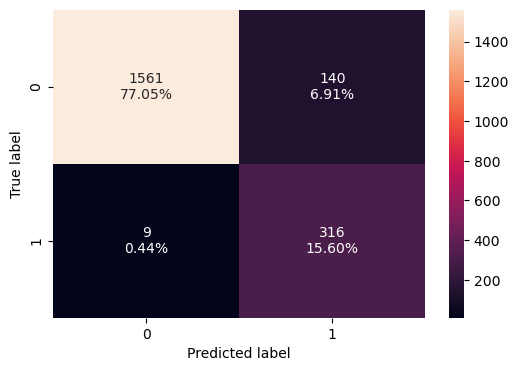

In [ ]:
confusion_matrix_sklearn(tuned_adaboost_un, x_test, y_test)

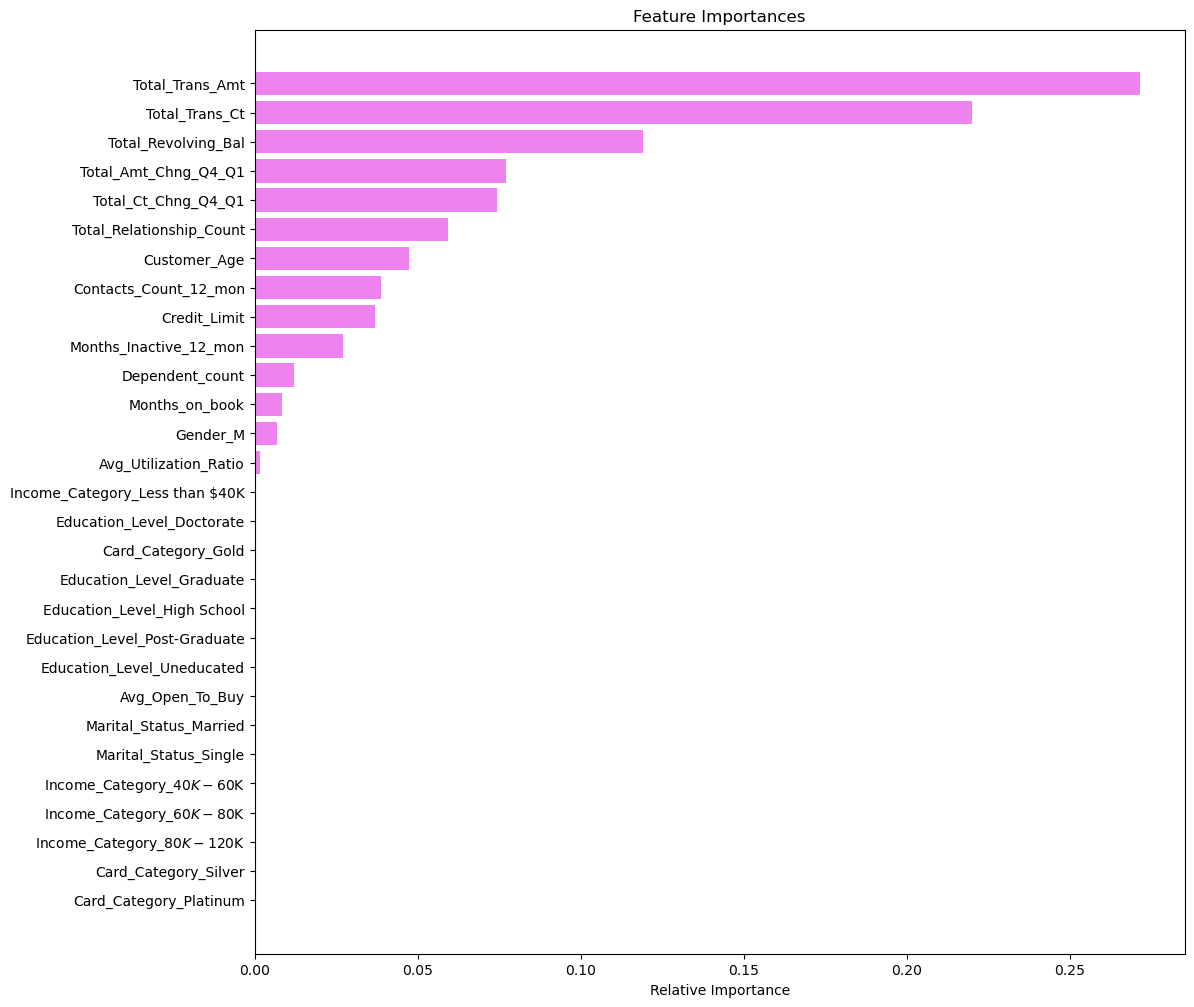

In [ ]:
# Feature Weight
feature_names = x_train.columns
importances = tuned_adaboost_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important parameters are:
- Total transaction amount
- Total transaction count
- Total revolving balance on the credit card.

# Business Insights and Conclusions

1. Transactional activity has a large impact on wether you are a customer or an attrited customer. The business should significantly focus on customers with higher transactional volume and transaction count as those are potential attrited customers.
2. Customers with high revolving balance will have a tendency to stop becoming bank customers.
3. Customers with a higher transactional ratio and transactional count ratio from Q4 to Q1 will also be more likely to become attrited customers, so the bank should focus on them.
4. If these metrics do not sufice the bank should focus on customers with more products, a higher age, higher number of contracts, higher credit limits, and months innactive to see if a customer is at risk of becoming attrited.
5. Overall income, card category, education level, marital status, and utilization ratio have little to no effect on customer attrition so the bank can continue to gather a wide spectrum of client types without risk of a certain generic aspect affecting attrition.

***

In [110]:
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/UT AI Course//Module 3 - Ensemble and Tuning/Project/ETMT_Project_LearnerNotebook_FullCode.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/UT AI Course//Module 3 - Ensemble and Tuning/Project/ETMT_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 3380940 bytes to /content/drive/MyDrive/UT AI Course/Module 3 - Ensemble and Tuning/Project/ETMT_Project_LearnerNotebook_FullCode.html
